# <ins>"Исследование объявлений о продаже квартир"</ins>
___

**Содержание**
___
<a id='top'></a>
1. [Исходные данные](#Исходные-данные)
2. [Постановка задачи](#Постановка-задачи)
3. [Получение данных](#Получение-данных)
4. [Предварительная обработка данных](#Предварительная-обработка-данных)
5. [Обучение модели](#Обучение-модели)
6. [Выводы](#Выводы)

## Исходные данные

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Ваша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 

## Постановка задачи

* Найти и изучить пропущенные значения в столбцах.
* Рассмотреть типы данных в каждом столбце.
* Определить столбцы, в которых нужно изменить тип данных.
* Найти и устраните редкие и выбивающиеся значения.
* Добавить в таблицу новые столбцы со следующими параметрами:
    * цена одного квадратного метра;
    * день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
    * месяц публикации объявления;
    * год публикации объявления;
    * тип этажа квартиры (значения — «первый», «последний», «другой»);
    * расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
* Изучить следующие параметры объектов:
    * общая площадь;
    * жилая площадь;
    * площадь кухни;
    * цена объекта;
    * количество комнат;
    * высота потолков;
    * этаж квартиры;
    * тип этажа квартиры («первый», «последний», «другой»);
    * общее количество этажей в доме;
    * расстояние до центра города в метрах;
    * расстояние до ближайшего аэропорта;
    * расстояние до ближайшего парка;
    * день и месяц публикации объявления.
* Построить отдельные гистограммы для каждого из параметров.
* Изучить, как быстро продавались квартиры (столбец days_exposition)
 
Постройте гистограмму.
Посчитайте среднее и медиану.
В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?
Какие факторы больше всего влияют на общую (полную) стоимость объекта?
 Изучите, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.
Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.
Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

## Получение данных

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_heigh`t — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

In [503]:
# Импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [504]:
try:
    data = pd.read_csv(r'D:\Local Python Project\Ya_praktikum\datasets\real_estate_data.csv', sep='\t')
except FileNotFoundError:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [505]:
# Задаем размер объектов графиков
width = 12
height = 4

In [506]:
# Задаем настройки графиков
graph_set = {'figure.figsize': (width, height),
             'axes.grid.axis': 'y', 
             'grid.color': 'gray', 
             'grid.linestyle': ':',
             'grid.linewidth': 0.4}

In [507]:
# Вносим изменения в настройки графиков
for k, v in graph_set.items():
    mpl.rcParams[k] = v

In [508]:
# Определяем глобальные настройки графиков
bar_color = 'deepskyblue'
fd_12 = {'size': 12, 'weight': 'bold', 'color': 'gray'}
fd_16 = {'size': 16, 'weight': 'bold', 'color': 'gray'}

In [509]:
# Устанавливаем формат вывода чисел
pd.options.display.float_format = '{:20,.2f}'.format

In [510]:
# Создадим функцию для первичной оценки датасета
def fast_eda(data, row_num=5):
    print(f'Общая информация по датасету:')
    print()
    print(data.info())
    print()
    print(f'Количество дубликатов: {data.duplicated().sum()}')
    print()
    display(data.head(row_num))

In [511]:
fast_eda(data)

Общая информация по датасету:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  o

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [512]:
# Зададим размеры координатной сетки для графиков
h_size = 3
v_size = 7

In [513]:
def fast_hist(data, h_size, v_size, color, width=12, height=4):
    # Строим быстрые гистограммы
    fast_hist = data.hist(figsize=(width, height * v_size), 
                          color=color,
                          alpha=.75,
                          edgecolor='black',
                          linewidth=.5, 
                          layout=(v_size, h_size))

    # Настраиваем отображение
    for i, ax in enumerate(fast_hist.flatten()):

        if i % 3 == 0:
            ax.set_ylabel('Количество', weight='bold', color='gray')
        ax.grid(axis='x')
        ax.set_title(data.columns[i], fontdict=fd_12)
        ax.tick_params(axis='both', labelsize=8)

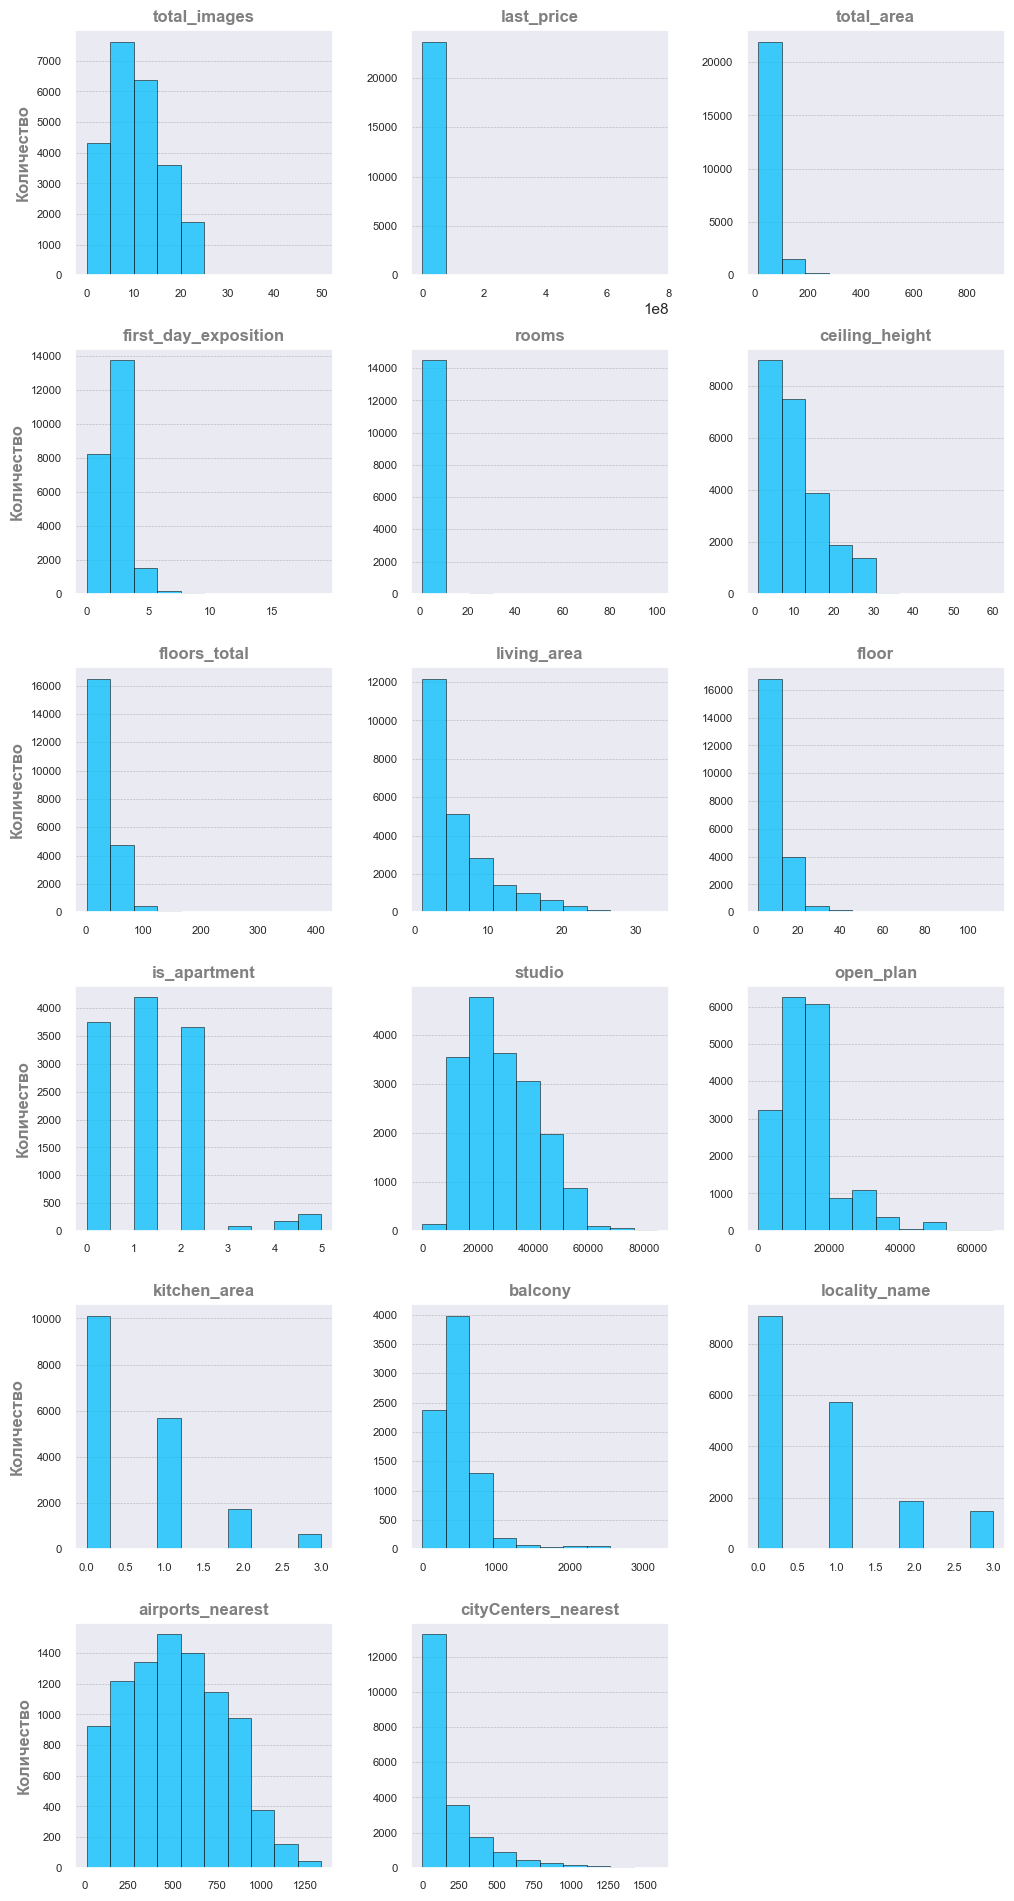

In [514]:
fast_hist(data, h_size=3, v_size=7, color=bar_color)

**Выводы:**
1. Во всех столбцах датасета присутствуют пропущенные значения, необходимо их обработать.
2. Названия столбцов необходимо привести к единому стилю.
3. В датасете отсутствуют явные дубликаты.


## Предварительная обработка данных

### Приведение названий столбцов датафрейма к единому стилю.

In [515]:
# Выводим список с названиями столбцов
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [516]:
# Приводим столбцы к единому стилю
data = data.rename({'cityCenters_nearest': 'city_centers_nearest',
                    'parks_around3000': 'parks_around_3000',
                    'ponds_around3000': 'ponds_around_3000',
                    'studio': 'is_studio'}, axis=1)

In [517]:
# Проверям результат
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Обработка столбца `first_day_exposition`

<style>
      p {text-indent: 40px;}
</style>
Обработаем столбец `first_day_exposition`, уберем лишнюю информацию о времени публикации, оставим только дату.

In [518]:
# Переводим столбец в формат дататайм, осталяем только информацию о дате
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [519]:
# Проверяем результат
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN


### Обработка столбца `celling_height`

In [520]:
# Получаем количество пропусков
data['ceiling_height'].isna().sum()

9195

In [521]:
# Получаем первичную информацию о столбце
data['ceiling_height'].describe()

count              14,504.00
mean                    2.77
std                     1.26
min                     1.00
25%                     2.52
50%                     2.65
75%                     2.80
max                   100.00
Name: ceiling_height, dtype: float64

Как видно, что в данном столбце есть пропущенные данные, кроме того есть аномальные величины, настораживают минимальная высота потолка **1 м**. и максимальная высота в **100 м**. Определим сколько строк с такими значениями.

Во времена СССР допускалось проживание граждан в помещениях с высотой потолков не менее **2 м**., строительство новых жилых помещений с высотой потолка не менее **2.5 м**. Минимально разрешенная высота потолка в **2.5 м**. сохранилась в РФ и по сей день.

В Санкт-Петербурге много исторического жилья различных эпох и архитектурных стилей. Таким образом в данных могут встречаться квартиры с аномально низкими потолками например мансарды, цоколи или аномально высокими потолками, например в т.н. "сталинских" домах.

Предлагается считать высоту потолка аномальной если она меньше **2 м**.  и больше **4.5 м**.

Отфильтруем и сохраним в отдельную переменную `strange_height` столбец `ceiling_height` квартиры с потолками ниже 2 м. и выше 4.5м.

In [522]:
strange_height = data['ceiling_height'][(data['ceiling_height'] < 2) | (data['ceiling_height'] > 4.5)]
strange_height.count()

45

Получился список из **45** объектов, проверим какие значение вошли в него.

In [523]:
strange_height.value_counts()

ceiling_height
 27.00    8
 25.00    7
  8.00    3
  5.30    2
  4.70    2
 32.00    2
 14.00    1
  1.00    1
 10.30    1
  4.90    1
 27.50    1
  5.80    1
 22.60    1
  6.00    1
 20.00    1
  1.75    1
  8.30    1
  4.65    1
  5.50    1
  5.20    1
  1.20    1
 26.00    1
 24.00    1
  4.80    1
  5.60    1
  5.00    1
100.00    1
Name: count, dtype: int64

Строки с высотой потолков больше **20 м**. и меньше **45 м**. это скорее всего ошибка при вводе данных, не поставлен разделитель дробной части. Значения этих строк разделим на **10** и сохраним.

In [524]:
# Обрабатываем значения больше 20 м и меньше 45 метров, делим значение на 10
data['ceiling_height'] = data['ceiling_height'].\
    where(~((data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 45)),
          data['ceiling_height'] / 10)

Высота потолка оказывает влияние на стоимость квартиры, чем выше потолок, тем выше стоимость, соответственно можно отнести этот показатель к категориальному признаку, усреднять его нельзя, данные с пропущенной высотой потолка необходимо удалить.

В настоящем проекте высота потолка не учавствует в дальнейшем анализе и есть риск вместе в пропусками высоты потолка удалить полезную информацию в других столбцах, поэтому все пропущенные данные в столбце `ceiling_height` заменим на медианное значение.

In [525]:
# Обрабатываем аномальные значения меньше 0 м и больше 4.5 метров, заменяем на медиану
data['ceiling_height'] = data['ceiling_height'].\
    where(~((data['ceiling_height'] < 2) | (data['ceiling_height'] > 4.5)), data['ceiling_height'].median())

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Аномальные и пропущенные данные в столбце `ceiling_height` могли возникнуть в следствии ошибки при вводе. Пропуски связанны с тем, что пользователи не заполнили соотвествующую строку при заполеннии объявления.

In [526]:
# Проверяем результат
data['ceiling_height'].isna().sum()

0

### Обработка столбца `floors_total`

In [527]:
# Проверим наличие пропусков
data['floors_total'].isna().sum()

86

In [528]:
# и состав значений
data['floors_total'].describe()

count              23,613.00
mean                   10.67
std                     6.60
min                     1.00
25%                     5.00
50%                     9.00
75%                    16.00
max                    60.00
Name: floors_total, dtype: float64

Предварительный анализ показывает, что в столбце `floors_total` присутствуют аномальные и пропущенные данные. Самым высоким по количеству этажей жилым зданием в Санкт-Петербурге является **ЖК "Князь Александр Невский"** - **37** этажей, второй количеству этажей **ЖК "Петр Великий"** - **32** этажа. Прочая жилая застройка в Санкт-Петербурге и Ленинградской области **29** этажей и ниже.

Причины появления пропусков и аномалий - ошибки при вводе данных либо при выгрузке.

In [529]:
# Избавляемся от аномальных этажей, заменяем аномальные значения выше 37 этажа на None.
data['floors_total'] = data['floors_total'].where(~(data['floors_total'] > 37), None)

# Составляем список аномальной этажности для исключения из столбца 'floors_total', заменяем все аномальные значения на None
strange_floor = [30, 31, 33, 34, 35, 36]

data['floors_total'] = data['floors_total'].\
    where(~(data['floors_total'].isin(strange_floor)), None)

Обработаем объекты находящиеся за пределами Санкт-Петербурга.

In [530]:
# Исключаем этажи выше 29 для объектов за пределами Санкт-Петербурга
data['floors_total'] = data['floors_total'].\
    where(~((data['floors_total'] > 29) & (data['locality_name'] != 'Санкт-Петербург')), None)

# Проверяем результат
data['floors_total'].isna().sum()

117

От аномальных значений избавились, осталось **117** объектов с значением **Nan** в столбце этажность. Проверим, где находяся эти объекты.

In [531]:
data[data['floors_total'].isna()]['locality_name'].value_counts()

locality_name
Санкт-Петербург                    100
Кудрово                              2
посёлок Мурино                       2
Красное Село                         2
поселок Мурино                       2
Кронштадт                            1
посёлок Щеглово                      1
посёлок Бугры                        1
городской посёлок Новоселье          1
посёлок Шушары                       1
поселок городского типа Токсово      1
деревня Новое Девяткино              1
посёлок Стрельна                     1
Name: count, dtype: int64

Подавляющее число объектов находится в черте Санкт-Петербурга. Можно было бы заменить **Nan** на медианное значение этажности, однако это может создать аномалию, например вблизи исторического центра может оказаться здание большой этажности. Проверим чему равна медиана.

In [532]:
data['floors_total'].median()

9.0

Медиана равна **9**, принимая во внимание, что строки содержащие **Nan** составлют всего **0,04%** от общего объема данных, предлагается их удалить. Столбец `total_floors` перевести в тип данных целого числа т.к. в нем не может быть дробных значений.

In [533]:
data = data.dropna(subset=['floors_total']).reset_index(drop=True)
data['floors_total'] = data['floors_total'].astype('int16')

Проверим, не возникает ли аномалий когда этаж квартиры превышает общее количество этажей в доме.

In [534]:
(data['floor'] > data['floors_total']).value_counts()

False    23582
Name: count, dtype: int64

Аномалий не обнаружено.

In [535]:
# Проверяем результат
data['floors_total'].isna().sum()

0

### Обработка столбца `living_area`

Обработаем пропуски в столбце `living_area`, в нем указывается информация о жилой площади. Жилая площадь это общая площадь квартиры за исключением площади коридоров, санузлов, кухни, балконов, лоджий, кладовых и т.п. Из этого правила есть исключение - квартиры студии. В законе нет понятия квартира-студия, все подобные квартиры называются однокомнатными и в них, в составе жилой площади учитывается площадь кухни.

In [536]:
# Считаем пропуски
data['living_area'].isna().sum()

1869

In [537]:
# Оценим состав данных
data['living_area'].describe()

count              21,713.00
mean                   34.47
std                    22.05
min                     2.00
25%                    18.60
50%                    30.00
75%                    42.30
max                   409.70
Name: living_area, dtype: float64

Явных аномалий в столбце не наблюдается, обращает на себя внимание только минимальное значение в **2 м2**.


Согласно нормам, минимальная жилая площадь квартиры допускается не менее **14 м2**. Проверим все объекты с жилой площадью менее **14 м2**. соберем их в отдельный датасет.

In [538]:
living_area_min = data[data['living_area'] < 14]
living_area_min.shape[0]

314

Таких объектов достаточное количество, похоже, что здесь допущены ошибки при составлении объявления.
Проверим к каким типам квартир они относятся.

In [539]:
living_area_min['rooms'].value_counts()

rooms
1    282
2     17
0     11
3      3
4      1
Name: count, dtype: int64

Большинство отностися к однушкам и это логично, все что к ним не относится, вызывает подозрение, кроме того есть строки, где указано нулевое количество комнат.

Отвлечемся от жилой площади, проверим столбец `rooms`, а заодно `is_studio` и `is_apartment`.

In [540]:
# Проверим сколько объектов с 0 комнат
len(data[data['rooms'] == 0])

192

**192** объекта с **0** комнат, это может быть ошибкой, а может быть, что эти объекты являются студиями или апартаментами, поэтому количество комнат не указанно.

Обработаем пропуски в столбцах `is_studio` и `is_apartment`.

In [541]:
data['is_studio'].isna().sum()

0

В столбце студия пропусков нет, проверяем `is_apartment`.

In [542]:
data['is_apartment'].isna().sum()

20811

Огромное количество пропусков, можно предположить, раз данный столбец не заполнен, значит объект не являтся апартаментами.

In [543]:
# Заполняем все пропуски False, проверяем результат
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

0

Обработали `is_studio` и `is_apartment`, вернемся к `rooms`, соберем все объекты с **0** комнат в отдельный датасет.

In [544]:
zero_rooms = data[data['rooms'] == 0]

Проверим, сколько объектов являются студией.

In [545]:
zero_rooms[zero_rooms['is_studio'] == True].shape[0]

134

Проверим сколько объектов являются студией и при этом у них пропуски в столбце площадь кухни.

In [546]:
zero_rooms[(zero_rooms['is_studio'] == True) & \
           (zero_rooms['kitchen_area'].isna())].shape[0]

134

**134** объекта. Формально, квартир студий не существует, в документах это однокомнатная квартира. Однокомнатная квартира, где совмещена кухня и жилая площадь, что подтверждается отсутствием данных в столбце площадь кухни.

Проверим, какие площади у студий, нет ли здесь аномалий, отсортирую список `zero_rooms` по убыванию общей площади.

In [547]:
zero_rooms[zero_rooms['is_studio']].sort_values(by='total_area', ascending=False).head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
19980,10,"16,300,000.00",98.40,2017-11-08,0,3.10,5,60.50,2,False,...,NaN,NaN,Санкт-Петербург,"26,972.00","5,819.00",0.00,NaN,1.00,674.00,537.00
3440,6,"7,400,000.00",73.60,2017-05-18,0,2.65,3,50.00,1,False,...,NaN,0.00,Санкт-Петербург,"26,581.00","6,085.00",0.00,NaN,1.00,348.00,60.00
21121,0,"8,200,000.00",71.00,2017-07-21,0,2.65,5,68.00,5,False,...,NaN,0.00,Санкт-Петербург,"20,170.00","1,261.00",2.00,295.00,3.00,366.00,30.00
13538,16,"8,100,000.00",58.40,2019-04-26,0,3.30,7,33.00,6,False,...,NaN,NaN,Санкт-Петербург,"14,509.00","8,288.00",0.00,NaN,0.00,NaN,NaN
9959,20,"5,050,000.00",44.20,2017-09-14,0,2.70,9,32.20,1,False,...,NaN,NaN,Санкт-Петербург,"24,329.00","5,955.00",0.00,NaN,2.00,520.00,69.00


Три объекта с большой общей площадью и при этом стоит статус `студия`, однако они находятся недалеко от центра и такое вполне может быть.

Проверим объекты в которых не указан статус студии и **0** комнат.

In [548]:
zero_rooms[zero_rooms['is_studio'] == False].head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
347,4,"2,320,000.00",25.00,2017-09-27,0,2.65,14,17.00,1,False,...,NaN,0.00,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.00
504,0,"3,375,000.00",34.40,2017-03-28,0,2.65,26,24.30,19,False,...,NaN,1.00,посёлок Парголово,"53,115.00","19,292.00",0.00,NaN,1.00,593.00,430.00
775,9,"2,600,000.00",26.10,2018-02-20,0,2.65,18,NaN,8,False,...,NaN,1.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.00
834,14,"1,900,000.00",35.00,2017-04-14,0,2.70,5,15.00,3,False,...,NaN,1.00,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.00
940,5,"2,200,000.00",23.00,2016-09-27,0,2.65,27,18.00,7,False,...,NaN,2.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.00


In [549]:
zero_rooms[zero_rooms['is_studio'] == False].shape[0]

58

In [550]:
zero_rooms[(zero_rooms['is_studio'] == False) & \
           (zero_rooms['is_studio'].isna())].shape[0]

0

Таких объектов **58**, проверим, какие площади у этих объектов, отсортируемся по убыванию.

In [551]:
zero_rooms[zero_rooms['is_studio'] == False].sort_values(by='total_area', ascending=False).head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
19291,5,"71,000,000.00",371.00,2018-07-26,0,3.57,7,NaN,6,False,...,NaN,NaN,Санкт-Петербург,"25,257.00","6,060.00",1.00,761.00,1.00,584.00,90.00
7201,8,"2,999,000.00",42.63,2017-11-27,0,2.65,16,25.70,2,False,...,NaN,2.00,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.00
834,14,"1,900,000.00",35.00,2017-04-14,0,2.70,5,15.00,3,False,...,NaN,1.00,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.00
4661,2,"3,650,000.00",35.00,2018-02-01,0,2.65,25,23.40,25,False,...,NaN,NaN,Санкт-Петербург,"43,431.00","12,188.00",0.00,NaN,0.00,NaN,100.00
504,0,"3,375,000.00",34.40,2017-03-28,0,2.65,26,24.30,19,False,...,NaN,1.00,посёлок Парголово,"53,115.00","19,292.00",0.00,NaN,1.00,593.00,430.00


В целом ничего подозрительного за исключением одного объекта площадью **371 м2**, на студию он явно не тянет. Все остальные объекты в датафрейме `zero_rooms` являются студиями.

Студиями в данном проекте будут объекты с **0** в столбце `rooms`, со статусом **Tru**e в столбце `is_studio` с **0** в столбце `kitchen_area`. Выполним эти корректировки в основном датафрейме.

Аномальный объект, откорректируем количество комнат, заменим статус и так же вернем в основной датафрейм.

Разберемся с аномальным объектом.

In [552]:
# Выясним среднее количество комнат дл объектов с похожей площадью
round(data[(data['total_area'] > 300) & (data['total_area'] < 400)]['rooms'].mean())

7

В столбце `rooms` укажем среднее значение для подобных объектов - **7** комнат.

In [553]:
# Корректируем количество комнат для объекта площадью 371м2
data.loc[data['total_area'] == 371, 'rooms'] = 7

Для всех объектов с **0** комнат установим статус **True** столбце `is_studio`.

In [554]:
data.loc[data['rooms'] == 0, 'is_studio'] = True

Для всех студий в столбце `kitchen_area` установим **0**.

In [555]:
data.loc[data['is_studio'] == True, 'kitchen_area'] = 0

Вернемся к жилой площади, улучшим фильтр, исключим из выборки квартиры студии.

In [556]:
living_area_min = data[(data['living_area'] < 14) & (data['is_studio'] == False)]
living_area_min.shape[0]

302

In [557]:
living_area_min['rooms'].value_counts()

rooms
1    281
2     17
3      3
4      1
Name: count, dtype: int64

Ничего не изменилось, но теперь мы точно знаем, что квартиры с **0** комнат это не ошибка данных, а квартира студия. Не вызывают вопросы студии и однокомантные квартиры, больше вопросов к **2-х**, **3-х** и **4-х** комнатным квартирам, здесь жилая площадь очень маленькая.

Оценим эти объекты, визуально сравним общую площадь, жилую площадь и площадь кухни.

In [558]:
living_area_min[['total_area', 'living_area', 'kitchen_area', 'rooms']]

,total_area,living_area,kitchen_area,rooms
6,37.30,10.60,14.40,1
101,37.00,12.00,13.00,1
114,21.40,8.30,6.30,1
246,31.00,10.00,NaN,1
350,48.60,13.00,15.00,1
...,...,...,...,...
23366,37.29,10.08,16.88,1
23458,47.67,13.59,17.87,1
23459,139.00,3.00,16.00,3
23556,23.00,12.60,5.00,1


Обращает на себя внимание, что есть объекты у которых площадь кухни более чем вдвое превышает жилую, сгруппируем такие объекты.

In [559]:
living_area_min[living_area_min['living_area'] * 2 < \
                living_area_min['kitchen_area']][['total_area', 
                                                  'living_area', 
                                                  'kitchen_area', 
                                                  'rooms',]]

,total_area,living_area,kitchen_area,rooms
507,69.00,13.00,50.00,1
675,43.00,9.00,23.00,1
1319,52.00,9.00,32.00,2
2143,56.30,11.40,27.40,1
2297,62.40,8.40,41.00,2
3225,41.00,3.00,11.00,1
4054,56.60,13.30,30.50,1
10384,43.00,10.00,22.00,1
13839,52.00,2.00,9.00,2
15656,50.00,12.00,25.00,1


В данной выборке есть аномалии, площадь кухни **3 м2**, а жилая **16 м2** в трехкомнатной квартире площадью **139 м2** или **30 м2** кухня, **10.5 м2** жилая, при площади **60.2 м2** в двушке, эта ошибка могла возникнуть в случае если были пререпутаны соответствующие поля при подаче объявления. Это разовые ошибки, в целом, в современном строительстве довольно распространены объекты, у которых большая кухня-столовая и небольшая спальня.

Обработать эту выборку получиться только вручную, поэтому предлагается из основного датафрейма удалить наиболее явные аномалии по индексу.

In [560]:
data = data.drop(index=[1319, 3225, 13839, 15948, 20888, 23459]).reset_index(drop=True)

Остается обработать пропуски в столбце `living_area`, усреднять пропуски в этом столбце опасно, можно создать аномалию когда жилая площадь окажется больше общей площади квартиры. На данном этапе предлагается заменить пропуски **0**, чтобы не терять данные из других столбцов.

In [561]:
# Избавляемся от Nan
data['living_area'] = data['living_area'].fillna(0)

In [562]:
# Проверяем, нет ли объектов с жилой площадью превышающих общую площадь
(data['living_area'] > data['total_area']).value_counts()

False    23576
Name: count, dtype: int64

In [563]:
data['living_area'].isna().sum()

0

### Обработка столбеца `kitchen_area`

Проверим столбец на аномалии, не превышает ли площадь кухни общую, удалим пропущенные значения.

In [564]:
data['kitchen_area'].isna().sum()

2026

In [565]:
data[data['is_studio'] == False]['kitchen_area'].describe()

count              21,348.00
mean                   10.55
std                     5.90
min                     1.30
25%                     7.00
50%                     9.10
75%                    12.00
max                   112.00
Name: kitchen_area, dtype: float64

Исключаем из фильтра квартиры студии с нулевой площадью кухни. Максимальная кухня **112 м2**., с учетом того, что есть объекты с жилой площадь в более **400 м2** это возможно, обращает на себя внимание минимальное значение **1.3 м**. Проверим все предложения меньше **25%** процентиля.

In [566]:
little_kitchen = data[(data['kitchen_area'] < 7) & (data['is_studio'] == False)]
little_kitchen.shape[0]

4421

Таких объектов очень много, отсортируем по возрастанию и посмотрим на первые **10**.

In [567]:
little_kitchen[['total_area','living_area', 'kitchen_area', 'rooms']]. \
    sort_values(by='kitchen_area', ascending=True).head(10)

,total_area,living_area,kitchen_area,rooms
20110,28.50,19.50,1.30,1
6226,24.00,16.00,2.00,2
19536,14.00,11.00,2.00,1
21307,20.00,14.00,2.00,1
16277,25.70,22.60,2.00,1
9093,23.29,21.00,2.00,1
900,27.00,18.00,2.00,1
10970,32.00,16.00,2.00,1
17736,34.70,15.50,2.30,1
8686,18.40,14.00,2.40,1


Принимая во внимание, что квартиры-студии исключены из этого списка, можно предположить, что допущены ошибки при подаче объявления. Чтобы сохранить данные, в данном случае предлагается заменить все значения меньше **25%** процентиля на **25%** процентиль.

In [568]:
data['kitchen_area'] = data['kitchen_area'].where(~((data['kitchen_area'] < 7) & \
                                                    (data['is_studio'] == False)), 7)

Избавились от аномальных значений, теперь обработаем пропуски.
Т.к. тот столбец будет участвовать в дальнейшем анализе, усреднять его некорректно, на данном этапе заполним его **0**, что бы в дальнейшем по ним можно было отфильтроваться и использовать другие данные из этих строк.

In [569]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)

In [570]:
data['kitchen_area'].isna().sum()

0

### Обработка столбца `balcony`

In [571]:
data['balcony'].isna().sum()

11462

In [572]:
data['balcony'].describe()

count              12,114.00
mean                    1.15
std                     1.07
min                     0.00
25%                     0.00
50%                     1.00
75%                     2.00
max                     5.00
Name: balcony, dtype: float64

Много пропущенных данных, есть квартиры с пятью балконами, проверим все что больше **2-х**.

In [573]:
lots_of_balconies = data[data['balcony'] >= 3]
lots_of_balconies.shape[0]

567

Таких квартир в Санкт-Петербурге продается **567 шт**., это выглядит необычно.

In [574]:
lots_of_balconies['balcony'].value_counts()

balcony
5.00    303
4.00    183
3.00     81
Name: count, dtype: int64

Аномально много квартир с количеством балконов больше **2-х**, посмотрим, что это за квартиры.

In [575]:
lots_of_balconies.sort_values(by='balcony', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
41,16,"7,900,000.00",74.00,2016-05-04,3,2.65,14,59.00,8,False,...,12.00,5.00,Санкт-Петербург,"37,715.00","12,612.00",1.00,725.00,1.00,759.00,179.00
14821,8,"18,000,000.00",108.00,2017-11-10,3,2.65,8,57.30,7,False,...,16.00,5.00,Санкт-Петербург,"15,780.00","7,830.00",0.00,NaN,0.00,NaN,38.00
14506,19,"8,600,000.00",86.60,2019-04-30,4,2.55,10,60.00,2,False,...,0.00,5.00,Санкт-Петербург,"45,968.00","18,692.00",0.00,NaN,0.00,NaN,NaN
14473,5,"7,602,000.00",84.00,2018-01-01,3,2.75,12,46.60,6,False,...,18.90,5.00,Сестрорецк,"59,377.00","36,307.00",1.00,88.00,2.00,140.00,112.00
14453,5,"35,290,000.00",116.00,2018-10-10,3,3.00,20,49.00,14,False,...,32.70,5.00,Санкт-Петербург,"13,341.00","8,871.00",1.00,416.00,3.00,596.00,NaN
14400,3,"9,900,000.00",183.00,2017-02-09,5,2.83,14,112.00,4,False,...,14.00,5.00,Санкт-Петербург,"10,997.00","11,082.00",0.00,NaN,1.00,418.00,129.00
14320,20,"3,800,000.00",57.70,2019-03-14,3,2.60,9,39.30,1,False,...,7.00,5.00,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14027,2,"4,200,000.00",57.00,2018-06-15,2,2.65,25,33.10,15,False,...,11.00,5.00,посёлок Шушары,"13,005.00","18,791.00",0.00,NaN,0.00,NaN,69.00
14015,0,"7,500,000.00",93.00,2018-02-20,2,2.70,12,42.00,12,False,...,25.00,5.00,Санкт-Петербург,"20,867.00","22,579.00",0.00,NaN,1.00,886.00,54.00
13996,10,"5,350,000.00",70.60,2018-11-02,2,2.75,16,44.60,8,False,...,11.90,5.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,174.00


Обычные квартиры, очень похоже на ошибку данных. Предлагается перевести эту колонку в булев тип данных т.е. балкон(ы) есть или нет, в пользу этого решения говорит среднее количество и медианное количество балконов указывающих на **1**. Пропущенные данные заменим на **False**.

In [576]:
# Удаляем пропуски
data['balcony'] = data['balcony'].fillna(False)

# Переводим в булев тип данных
data['balcony'] = data['balcony'].astype('bool')

In [577]:
data['balcony'].isna().sum()

0

### Обработка столбца `locality_name`

В этом столбце есть пропуски данных и возможно неявные дубликаты.
Заполнить пропуски можно через оценку удаленности от центра города, выясним какова максимальная удаленность от центра у объектов, в которых заполнен столбец `locality_name`.

In [578]:
# Проверяем количество пропусков
data['locality_name'].isna().sum()

48

Выясним максимальное удаление от центра для объектов находящихся в Санкт-Петербурге.

In [579]:
data[data['locality_name'] == 'Санкт-Петербург']['city_centers_nearest'].max()

29493.0

Для объектов в черте Санкт-Петербурга максимальная удаленность в радиусе **30 км**., строки по которым не будет расстояния до центра города или расстояние более **30 км**. удаляем. Для строк с расстоянием до центра менее **30 000 м**. заполняем Санкт-Петербург.

In [580]:
# Заполняем пропущенные значения в столбце locality_name
data['locality_name'] = data['locality_name'].\
    where(~(data['city_centers_nearest'] < 30000), data['locality_name'].fillna('Санкт-Петербург'))

# Удаляем строки с Nan в столбце locality_name, сбрасываем индексы, проверяем результат
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

В представленном датасете большое количество наименований населенных пунктов разных типов, неявные дубли, например **поселок / посёлок**.
Для обработки неявных дубликатов предлагается разбить на два столбца, в первом тип населенного пункта во втором название.

In [581]:
# Создаем словарь с полным и сокращенным наименование типа населенных пунктов
locality_type = {'деревня ': 'д.',
                 'посёлок ': 'поселок ',
                 'поселок городского типа ': 'пгт.',
                 'коттеджный поселок ': 'п.',
                 'городской поселок ': 'гп.',
                 'поселок станции ': 'пст.',
                 'поселок при железнодорожной станции ': 'п ж/д ст.',
                 'поселок ': 'п.',
                 'село ': 'с.',
                 'садовое товарищество ': 'ст.',
                 'садоводческое некоммерческое товарищество ': 'снт.'}

In [582]:
# Заменяем полные названия типов населенных пунктов на сокращенные, избавляемся от дублей в поселках
for long_type, short_type in locality_type.items():
    data['locality_name'] = data['locality_name'].str.replace(long_type, short_type, 1)

# Добавляем обозначение города к строкам начинающимся с заглавной буквы
data['locality_name'] = data['locality_name'].\
    where(~(data['locality_name'].apply(lambda x: x[0].isupper())), 'г.' + data['locality_name'])

In [583]:
# Добавляем столбец 'locality_type' перед столбцом 'locality_name'
data.insert(14, 'locality_type', '')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23566 entries, 0 to 23565
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23566 non-null  int64         
 1   last_price            23566 non-null  float64       
 2   total_area            23566 non-null  float64       
 3   first_day_exposition  23566 non-null  datetime64[ns]
 4   rooms                 23566 non-null  int64         
 5   ceiling_height        23566 non-null  float64       
 6   floors_total          23566 non-null  int16         
 7   living_area           23566 non-null  float64       
 8   floor                 23566 non-null  int64         
 9   is_apartment          23566 non-null  bool          
 10  is_studio             23566 non-null  bool          
 11  open_plan             23566 non-null  bool          
 12  kitchen_area          23566 non-null  float64       
 13  balcony         

In [584]:
# Разбиваем locality_name по точке на два столбца.
data[['locality_type', 'locality_name']] = data['locality_name'].str.split('.', expand=True)

In [585]:
# Создаем сводную таблицу для выявления дублей
locality = data.pivot_table(index='locality_name', 
                            columns='locality_type', 
                            values='balcony', 
                            aggfunc='count')
locality.head(10)

locality_type,г,гп,д,п,п ж/д ст,пгт,пст,с,снт,ст
locality_name,,,,,,,,,,
Агалатово,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Александровская,NaN,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN
Алексеевка,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN
Аннино,NaN,NaN,NaN,16.00,NaN,NaN,NaN,NaN,NaN,NaN
Аро,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Барышево,NaN,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN
Батово,NaN,NaN,9.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Бегуницы,NaN,NaN,17.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Белогорка,NaN,NaN,11.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [586]:
# Удаляем все строки в которых менее 2-х значений, заполняем пропуски 0
locality = locality.dropna(thresh=2).fillna(0)
locality.head(5)

locality_type,г,гп,д,п,п ж/д ст,пгт,пст,с,снт,ст
locality_name,,,,,,,,,,
Большая Ижора,0.00,16.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
Вещево,0.00,0.00,0.00,0.00,1.00,0.00,4.00,0.00,0.00,0.00
Гарболово,0.00,0.00,13.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00
Громово,0.00,0.00,0.00,3.00,0.00,0.00,3.00,0.00,0.00,0.00
Зимитицы,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00


In [587]:
# Получаем количество населенных пунктов для которых указанно два или более типа
locality.shape[0]

23

**23** населенных пункта имеют дубликаты.

In [588]:
# Создаем пустой словарь где ключом будет название населенного пункта, а значением тип населенного пункта
locality_name = {}

# Запускам цикл по населенным пунктам из сводной таблицы для заполнения словаря
for city in locality.index:
    
    # Определяем максимальное количество использований типа населенного пункта
    max_count_locality_type = locality[locality.index == city].\
        apply(max, axis=1).values[0]
    
    # Определяем в каком столбце находится максимальное количество использований и сохраням его название
    column_name = locality[locality.index == city].\
        apply(lambda row: row[row == max_count_locality_type].index, axis=1)
    
    # Записываем в словарь наименование населенного пункта и тип населенного пункта
    locality_name[city] = column_name[0].values[0]

In [589]:
# Запускаем цикл по элементам словаря и избавляемся от дубликатов в основном датафрейме
for city, city_type in locality_name.items():
    data['locality_type'] = data['locality_type'].where(~(data['locality_name'] == city), city_type)

In [590]:
# Проверяем результат через повторное создание сводной таблицы
locality = data.pivot_table(index='locality_name', 
                            columns='locality_type', 
                            values='balcony', 
                            aggfunc='count')
locality = locality.dropna(thresh=2).fillna(0)
locality.shape[0]

0

In [591]:
# Проверяем результат
data['locality_name'].isna().sum(), data['locality_type'].isna().sum()

(0, 0)

### Обработка столбца `airports_nearest`

In [592]:
data['airports_nearest'].isna().sum()

5524

In [593]:
data['airports_nearest'].describe()

count              18,042.00
mean               28,802.12
std                12,626.58
min                     0.00
25%                18,557.00
50%                26,757.00
75%                37,273.00
max                84,869.00
Name: airports_nearest, dtype: float64

В столбце много пропусков, аномалий не замечено за исключением **0** в минимальном значении.


Заполним пропуски медианным расстоянием по каждому населенному пункту.

In [594]:
# Проверим сколько объектов с 0 расстоянием до аэропорта
data[data['airports_nearest'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_type,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
20969,0,"7,000,000.00",34.70,2018-09-23,1,2.70,9,19.80,3,False,...,True,г,Санкт-Петербург,0.00,"22,801.00",0.00,NaN,0.00,NaN,60.00


Исправим единичный случай по индексу, заменим **0** на медиану для объектов в черте Санкт-Петербурга.

In [595]:
data.loc[20969,'airports_nearest'] = \
    data[data['locality_name'] == 'Санкт-Петербург']['airports_nearest'].median()

In [596]:
# Создаем сводную таблицу с медианным расстоянием до аэропорта по каждому населенному пункту
airport_distance = data[data['airports_nearest'] != 0].pivot_table(index='locality_name',
                                                                   values='airports_nearest',
                                                                   aggfunc='median')

In [597]:
# Запускаем цикл по каждому из населенных пунктов из сводной таблицы, в основном датафрейме nan заменяем на медиану
for city in airport_distance.index:

    distance = airport_distance[airport_distance.index == city].values[0]

    data['airports_nearest'] = data['airports_nearest'].where(~((data['locality_name'] == city) &
                 (data['airports_nearest'].isna())), distance)

In [598]:
data['airports_nearest'].isna().sum()

5432

Удалось заполнить около **100** строк, остальные пропуски можно было бы заполнить справочной информацией о расстоянии между населенным пунктом, в котором находится объект и аэропортом, однако это выходит за рамки данного проекта.

Т.к. данных по расстоянию до аэропорта нет в строках с объектами расположенными за чертой Санкт-Петербурга, предлагается на текущем этапе заполнить пропуски **0**.

In [599]:
data['airports_nearest'] = data['airports_nearest'].fillna(0)

In [600]:
# Проверяем результат
data['airports_nearest'].isna().sum()

0

### Обработка столбца `city_centers_nearest`

In [601]:
data['city_centers_nearest'].isna().sum()

5501

In [602]:
data['city_centers_nearest'].describe()

count              18,065.00
mean               14,172.42
std                 8,611.55
min                   181.00
25%                 9,229.00
50%                13,073.00
75%                16,268.00
max                65,968.00
Name: city_centers_nearest, dtype: float64

Пропуски есть, аномалий не замечено. Обработку проведем по тому же принципу, что и расстояние до аэропорта.

In [603]:
# Создаем сводную таблицу с медианными расстояниями до центра
data_city_center = data[data['city_centers_nearest'] != 0].pivot_table(index='locality_name',
                                                                       values='city_centers_nearest',
                                                                       aggfunc='median')

In [604]:
# Запускаем цикл заменяющий в основном датафрейме Nan на медианное расстояние для населенных пунктов из сводной таблицы
for city in data_city_center.index:

    distance = data_city_center[data_city_center.index == city].values[0]

    data['city_centers_nearest'] = data['city_centers_nearest'].where(~((data['locality_name'] == city) &
                                                                        (data['city_centers_nearest'].isna())), distance)

In [605]:
data['city_centers_nearest'].isna().sum()

5432

Здесь спасти ничего не удалось, на данном этапе заменяем **Nan** на **0**.

In [606]:
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(0)

In [607]:
# Проверяем результат
data['city_centers_nearest'].isna().sum()

0

### Обработка столбцов `parks_around_3000` и `parks_nearest`

В столбце есть пропуски, проверим состав уникальных значений и их количество.

In [608]:
data['parks_around_3000'].isna().sum()

5500

In [609]:
data['parks_around_3000'].describe()

count              18,066.00
mean                    0.61
std                     0.80
min                     0.00
25%                     0.00
50%                     0.00
75%                     1.00
max                     3.00
Name: parks_around_3000, dtype: float64

In [610]:
data['parks_around_3000'].value_counts()

parks_around_3000
0.00    10031
1.00     5652
2.00     1738
3.00      645
Name: count, dtype: int64

Данные не выглядят аномальными, в Санкт-Петребурге много парков и у объектов в определенных районах города могут быть в радиусе **3 км**. километров **3** парка.

In [611]:
# Отсутствующие значения заполняем 0
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)

Проверим, возможно в столбце `park_nearest` есть данные о ближайшем парке в радиусе **3 км**, но нет записи в столбце `park_around_3000`.

In [612]:
data[(data['parks_nearest'] <= 3000) & (data['parks_around_3000'] == 0)].shape[0]

0

Проверим в обратную сторону, есть данные в `parks_around_3000`, но нет данных в `parks_nearest`.

In [613]:
data[(data['parks_around_3000'] !=0) & (data['parks_nearest'].isna())].shape[0]

0

Строки, где расстояние до парка не указанно, заполняем **0**.

In [614]:
data['parks_nearest'] = data['parks_nearest'].fillna(0)

In [615]:
data['parks_nearest'].isna().sum(), data['parks_around_3000'].isna().sum()

(0, 0)

### Обработка столбцов `ponds_around_3000` и `ponds_nearest`

В столбце есть пропуски, проверим состав уникальных значений и их количество.

In [616]:
data['ponds_around_3000'].isna().sum()

5500

In [617]:
data['ponds_around_3000'].describe()

count              18,066.00
mean                    0.77
std                     0.94
min                     0.00
25%                     0.00
50%                     0.00
75%                     1.00
max                     3.00
Name: ponds_around_3000, dtype: float64

In [618]:
data['ponds_around_3000'].value_counts()

ponds_around_3000
0.00    9039
1.00    5675
2.00    1886
3.00    1466
Name: count, dtype: int64

Ситуация аналогичная паркам, явных аномалий нет, заменяем **Nan** на **0**.

In [619]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)

Проверим, возможно в столбце `ponds_nearest` есть данные о ближайшем водоеме в радиусе **3** км., но нет записи в столбце `ponds_around_3000`.

In [620]:
data[(data['ponds_nearest'] <= 3000) & (data['ponds_around_3000'] == 0)].shape[0]

0

Проверим в обратную сторону.

In [621]:
data[(data['ponds_nearest'].isna()) & (data['ponds_around_3000'] != 0)].shape[0]

0

Строки, где расстояние до водоема не указанно, заполняем **0**.

In [622]:
# Заполняем пропуски нулями
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

In [623]:
# Проверяем результат
data['ponds_nearest'].isna().sum(), data['ponds_around_3000'].isna().sum()

(0, 0)

### Обработка столбца `days_exposition`

В столбце есть пропуски, причина появления пропусков, скорее всего в том, что объект на момент формирования датасета не был продан. Предлагается заполнить пропуски **0**.

In [624]:
# Посмотрим количество пропусков
data['days_exposition'].isna().sum()

3163

In [625]:
# Смотрим описание датафрейма
data['days_exposition'].describe()

count              20,403.00
mean                  180.91
std                   219.79
min                     1.00
25%                    45.00
50%                    95.00
75%                   232.00
max                 1,580.00
Name: days_exposition, dtype: float64

In [626]:
# Заполняем пропуски нулями
data['days_exposition'] = data['days_exposition'].fillna(0)

In [627]:
# Проверяем результат
data['days_exposition'].isna().sum()

0

### Обработка столбца `last_price`

Завершая предобработку данных, проверим столбец `last_price`, пропусков в нем нет, однако могут быть ошибки или аномальные значения.

In [628]:
data['last_price'].describe().apply('{0:.2f}'.format)

count        23566.00
mean       6537940.08
std       10905219.11
min          12190.00
25%        3400000.00
50%        4640000.00
75%        6790000.00
max      763000000.00
Name: last_price, dtype: object

Странным выглядит минимальная цена за квартиру, всего **12 190 руб.** максимальная цена **763 млн. руб.** отсортируем датасет по возрастанию.

In [629]:
data.sort_values(by='last_price').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_type,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8749,7,"12,190.00",109.00,2019-03-20,2,2.75,25,32.00,25,False,...,False,г,Санкт-Петербург,"36,421.00","9,176.00",1.00,805.00,0.00,0.00,8.00
17358,7,"430,000.00",30.40,2019-04-22,1,2.65,2,16.00,1,False,...,False,г,Сланцы,0.00,0.00,0.00,0.00,0.00,0.00,0.00
14822,5,"430,000.00",54.00,2018-06-26,2,2.65,3,0.00,3,False,...,False,пст,Свирь,0.00,0.00,0.00,0.00,0.00,0.00,44.00
16182,18,"440,000.00",40.00,2018-07-10,1,2.65,5,0.00,1,False,...,False,д,Старополье,0.00,0.00,0.00,0.00,0.00,0.00,45.00
9531,7,"450,000.00",43.40,2018-08-31,2,2.65,5,30.30,3,False,...,False,д,Старополье,0.00,0.00,0.00,0.00,0.00,0.00,96.00


Помимо очень дешевой квартиры за **12 190 руб.** видим, что есть ряд очень дешевых предложений. Добавим колонку цена квадратного метра.

In [630]:
# Добавляем столбец
data.insert(3, 'price_square_meter', data['last_price'] / data['total_area'])

In [631]:
# Проверям результат
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23566 entries, 0 to 23565
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23566 non-null  int64         
 1   last_price            23566 non-null  float64       
 2   total_area            23566 non-null  float64       
 3   price_square_meter    23566 non-null  float64       
 4   first_day_exposition  23566 non-null  datetime64[ns]
 5   rooms                 23566 non-null  int64         
 6   ceiling_height        23566 non-null  float64       
 7   floors_total          23566 non-null  int16         
 8   living_area           23566 non-null  float64       
 9   floor                 23566 non-null  int64         
 10  is_apartment          23566 non-null  bool          
 11  is_studio             23566 non-null  bool          
 12  open_plan             23566 non-null  bool          
 13  kitchen_area    

Построим график стоимости квадратного метра для объектов в Санкт-Петербурге и за пределами Санкт-Петербурга.

In [632]:
# Создаем вспомогательный датасет для объектов в Санкт-Петербурге
spb = data[data['locality_name'] == 'Санкт-Петербург']

# Создаем вспомгательный датасет для объектов за пределами Санкт-Петербурга
lo = data[data['locality_name'] != 'Санкт-Петербург']

# Создаем словарь с датафреймами и названиями регионов
regions = {'г.Санкт-Петербург': spb, 
           'Ленинградской области': lo}

In [633]:
# Задаем размеры шаблона для графиков
h_size = 1
v_size = 2

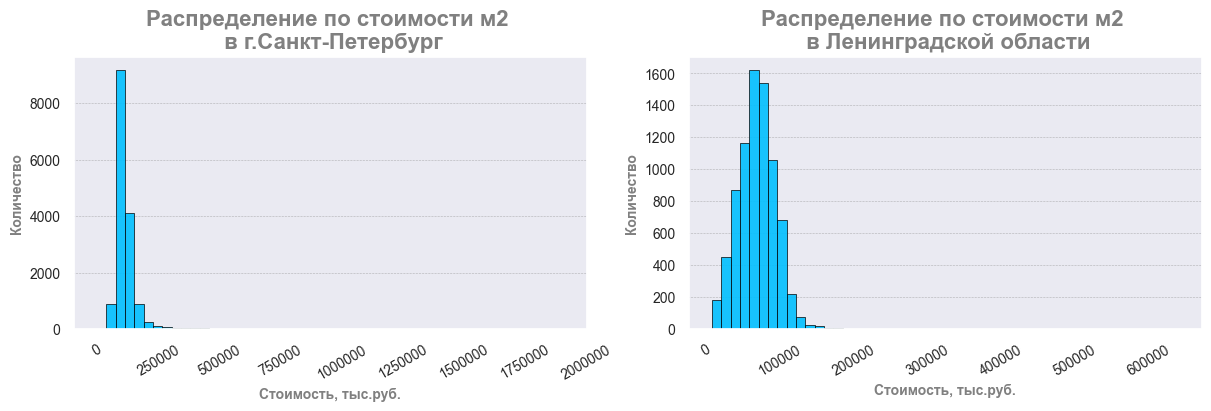

In [634]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height)
sns.set(rc=graph_set)
fig, axs = plt.subplots(h_size, v_size, constrained_layout=True)

i = 0

for reg_name, reg_data in regions.items():

    # Рисуем график
    ax = sns.histplot(reg_data['price_square_meter'], 
                      color=bar_color,
                      alpha=.9, 
                      bins=50, 
                      ax=axs[i], 
                      linewidth=.5, 
                      edgecolor='black')
    
    i += 1

    # Настраиваем параметры
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.tick_params(axis='x', rotation=30)
    ax.set_title(f'Распределение по стоимости м2 \n в {reg_name}', \
                 fontdict=fd_16)
    ax.tick_params(axis='both', labelsize=10)
    ax.set_ylabel('Количество', fontsize=10, weight='bold', color='gray') 
    ax.set_xlabel('Стоимость, тыс.руб.', fontsize=10, weight='bold', color='gray') ;

За счет того, что в датасете есть очень низкие и очень высокие цены (выбросы), графики неинформативны, отбросим **5%** данных по **2,5%** снизу и сверху для Санкт-Петербурга и **2%** данных для Ленобласти.

Доля отбрасываемых данных определена империческим путем.

In [635]:
# Определяем нижнюю и верхнюю границы стоимости квадратного метра для Санкт-Петербурга
spb_low_range = spb['price_square_meter'].quantile(0.025)
spb_high_range = spb['price_square_meter'].quantile(0.975)

In [636]:
# Определяем нижнюю границы стоимости квадратного метра за пределами Санкт-Петербурга
lo_low_range = lo['price_square_meter'].quantile(0.005)
lo_high_range = lo['price_square_meter'].quantile(0.995)

In [637]:
# Создадим список диапазоанов
ranges = [(spb_low_range, spb_high_range), (lo_low_range, lo_high_range)]

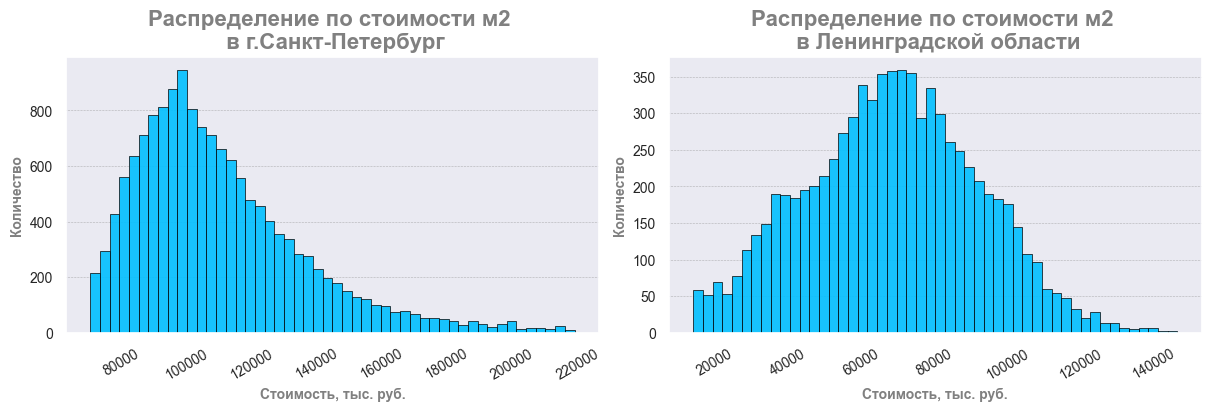

In [638]:
# Задаем параметры объекта для построения графиков
fig, axs = plt.subplots(h_size, v_size, constrained_layout=True)

i = 0

for reg_name, reg_data in regions.items():

    # Рисуем график
    ax = sns.histplot(reg_data['price_square_meter'], 
                      color=bar_color, 
                      alpha=.9, 
                      bins=50,
                      ax=axs[i], 
                      binrange=(ranges[i]), 
                      linewidth=.5, 
                      edgecolor='black')
    
    i += 1

    # Настраиваем параметры
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.tick_params(axis='x', rotation=30)
    ax.set_title(f'Распределение по стоимости м2 \n в {reg_name}', \
                 fontdict=fd_16)
    ax.tick_params(axis='both', labelsize=10)
    ax.set_ylabel('Количество', fontsize=10, weight='bold', color='gray') 
    ax.set_xlabel('Стоимость, тыс. руб.', fontsize=10, weight='bold', color='gray') ;

В таком виде графике более читаемы и точнее отражают рынок, внесем корректировки в основной датасет.

In [639]:
# Вносим корректировки в основной датасет для объектов в черте Санкт-Петербурга
data[data['locality_name'] == 'Санкт-Петербург'] = data[(data['price_square_meter'] < spb_high_range) &
                                                        (data['price_square_meter'] > spb_low_range)]

In [640]:
# Вносим корректировки в основной датасет для объектов за чертой Санкт-Петербурга
data[data['locality_name'] != 'Санкт-Петербург'] = data[(data['price_square_meter'] < lo_high_range) &
                                                        (data['price_square_meter'] > lo_low_range)]

In [641]:
# Проверяем результат
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23566 entries, 0 to 23565
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22702 non-null  float64       
 1   last_price            22702 non-null  float64       
 2   total_area            22702 non-null  float64       
 3   price_square_meter    22702 non-null  float64       
 4   first_day_exposition  22702 non-null  datetime64[ns]
 5   rooms                 22702 non-null  float64       
 6   ceiling_height        22702 non-null  float64       
 7   floors_total          22702 non-null  float64       
 8   living_area           22702 non-null  float64       
 9   floor                 22702 non-null  float64       
 10  is_apartment          22702 non-null  object        
 11  is_studio             22702 non-null  object        
 12  open_plan             22702 non-null  object        
 13  kitchen_area    

In [642]:
data['price_square_meter'].describe().apply('{0:.2f}'.format)

count     22702.00
mean      95850.92
std       32072.10
min       14144.74
25%       77436.63
50%       94960.41
75%      113207.55
max      219111.11
Name: price_square_meter, dtype: object

### Замена типов данных

Завершая предобработку данных заменим типы данных на целочисленный в столбцах, где не предполагается появления дробных значений, а так же уменьшим разрядность для экономии памяти.

In [643]:
# Удаляем все строки в которых есть пропущенные данные
data = data.dropna().reset_index(drop=True)

In [644]:
# Проверяем результат
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22702 entries, 0 to 22701
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22702 non-null  float64       
 1   last_price            22702 non-null  float64       
 2   total_area            22702 non-null  float64       
 3   price_square_meter    22702 non-null  float64       
 4   first_day_exposition  22702 non-null  datetime64[ns]
 5   rooms                 22702 non-null  float64       
 6   ceiling_height        22702 non-null  float64       
 7   floors_total          22702 non-null  float64       
 8   living_area           22702 non-null  float64       
 9   floor                 22702 non-null  float64       
 10  is_apartment          22702 non-null  object        
 11  is_studio             22702 non-null  object        
 12  open_plan             22702 non-null  object        
 13  kitchen_area    

In [645]:
# Создаем список со столбцами требующими замены типа данных
change_columns = ['total_images',
                  'last_price',
                  'rooms',
                  'floors_total',
                  'floor',
                  'price_square_meter',
                  'airports_nearest',
                  'city_centers_nearest',
                  'parks_around_3000',
                  'parks_nearest',
                  'ponds_around_3000',
                  'ponds_nearest',
                  'days_exposition']

# Выполняем замену
data[change_columns] = data[change_columns].astype('int32')

In [646]:
for col in data.columns:
    
    if data[col].dtype == 'float64':
        data[col] = data[col].astype('float32')

In [647]:
# Проверяем результат
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22702 entries, 0 to 22701
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22702 non-null  int32         
 1   last_price            22702 non-null  int32         
 2   total_area            22702 non-null  float32       
 3   price_square_meter    22702 non-null  int32         
 4   first_day_exposition  22702 non-null  datetime64[ns]
 5   rooms                 22702 non-null  int32         
 6   ceiling_height        22702 non-null  float32       
 7   floors_total          22702 non-null  int32         
 8   living_area           22702 non-null  float32       
 9   floor                 22702 non-null  int32         
 10  is_apartment          22702 non-null  object        
 11  is_studio             22702 non-null  object        
 12  open_plan             22702 non-null  object        
 13  kitchen_area    

**Выводы:**

1. Выполнена предварительная обработка данных, сохранено **95%** строк от исходного датасета.
2. Наибольшее недоверие вызывают данные по жилой площади и площади кухни. По этой причине пришлось аномально маленькие площади кухни заменить на медиану. Это необходимо учитывать при последующем анализе.
3. Студиями в данном проекте будут считаться объекты с **0** в столбце `rooms`, со статусом **True** в столбце `is_studio` и с **0** в столбце `kitchen_area`.
4. Пропущенные данные, которые не удалось восстановить заполнены **0**, это необходимо учитывать при дальнейшем анализе.
5. Основными причинами отсутствия данных могут быть ошибки при составлении объявления, не поставлен знак разделения целой и дробной части, перепутаны поля ввода, умышленные ошибки с целью ввести потенциального покупателя в заблуждения, а так же потери данных при выгрузке.

## Посчитайте и добавьте в таблицу новые столбцы

### День, месяц, год публикации

Добавим столбцы день недели, месяц, год публикации объявления

In [648]:
data['ad_publish_weekday'] = data['first_day_exposition'].dt.weekday.astype('int16')
data['ad_publish_month'] = data['first_day_exposition'].dt.month.astype('int16')
data['ad_publish_year'] = data['first_day_exposition'].dt.year.astype('int16')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22702 entries, 0 to 22701
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22702 non-null  int32         
 1   last_price            22702 non-null  int32         
 2   total_area            22702 non-null  float32       
 3   price_square_meter    22702 non-null  int32         
 4   first_day_exposition  22702 non-null  datetime64[ns]
 5   rooms                 22702 non-null  int32         
 6   ceiling_height        22702 non-null  float32       
 7   floors_total          22702 non-null  int32         
 8   living_area           22702 non-null  float32       
 9   floor                 22702 non-null  int32         
 10  is_apartment          22702 non-null  object        
 11  is_studio             22702 non-null  object        
 12  open_plan             22702 non-null  object        
 13  kitchen_area    

### Тип этажа квартиры

Добавим столбец с типом этажа квартиры.

In [649]:
# Создаем функцию определяющую тип этажа квартиры
def get_floor_type(df):
    
    if df['floor'] == 1:
        return 'Первый'
    elif df['floor'] != df['floors_total'] and df['floor'] != 1:
        return 'Другой'
    else:
        return 'Последний'

In [650]:
# Создаем новый столбец, применяем к нему функцию
data['floor_type'] = data.apply(get_floor_type, axis=1)

In [651]:
# Проверяем результат
data['floor_type'].value_counts()

floor_type
Другой       16742
Последний     3192
Первый        2768
Name: count, dtype: int64

### Расстояние до центра в километрах

Создадим столбец с расстоянием до центра города в километрах.

In [652]:
# Переведем расстояние до центра из метров в километры, дробную часть отбросим, проверяем результат
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).astype('int32')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22702 entries, 0 to 22701
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             22702 non-null  int32         
 1   last_price               22702 non-null  int32         
 2   total_area               22702 non-null  float32       
 3   price_square_meter       22702 non-null  int32         
 4   first_day_exposition     22702 non-null  datetime64[ns]
 5   rooms                    22702 non-null  int32         
 6   ceiling_height           22702 non-null  float32       
 7   floors_total             22702 non-null  int32         
 8   living_area              22702 non-null  float32       
 9   floor                    22702 non-null  int32         
 10  is_apartment             22702 non-null  object        
 11  is_studio                22702 non-null  object        
 12  open_plan                22702 n

## Исследовательский анализ данных

Исследуем ключевые параметры влияющие на стоимость жилья более детально.

### Общая площадь

Рассмотрим параметр общая площадь.

In [653]:
# Создадим функцию для вывода информации
def key_features(data, features, unit):

    data_max = f'{round(data.max(), 2):,.2f}'.replace(',', ' ')
    data_min = f'{round(data.min(), 2):,.2f}'.replace(',', ' ')
    data_mean = f'{round(data.mean(), 2):,.2f}'.replace(',', ' ')
    data_median = f'{round(data.median(), 2):,.2f}'.replace(',', ' ')

    print(f'--==<<< {features} >>>==-- \n')
    print(f'Максимум:     {data_max} {unit}.')
    print(f'Минимум:      {data_min} {unit}.')
    print(f'Среднее:      {data_mean} {unit}.')
    print(f'Медиана:      {data_median} {unit}.')

In [654]:
key_features(data['total_area'], 'Общая площадь', 'м2')

--==<<< Общая площадь >>>==-- 

Максимум:     590.00 м2.
Минимум:      12.00 м2.
Среднее:      58.50 м2.
Медиана:      51.00 м2.


Построим гистограммы для оценки количества предложений по общей площади.

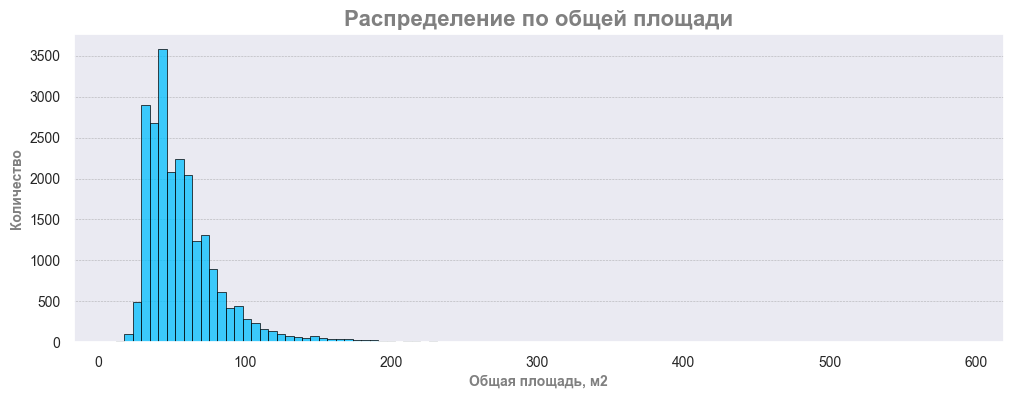

In [655]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height)
sns.set(rc=graph_set)

# Рисуем график 
ax = sns.histplot(data['total_area'], 
                  color=bar_color,
                  alpha=.75,  
                  bins=100,
                  linewidth=.5, 
                  edgecolor='black')

# Настраиваем параметры
ax.set_title('Распределение по общей площади', fontdict=fd_16)
ax.tick_params(axis='both', labelsize=10)
ax.set_ylabel('Количество', fontsize=10, weight='bold', color='gray') 
ax.set_xlabel('Общая площадь, м2', fontsize=10, weight='bold', color='gray') ;

Основная масса предложений сконцентрированна в диапазоне от 0 до 200 м2.

Для удобного восприятия разделим общий график на 3 сегмента:
* от **0** **до 100 м2**
* от **101** до **200 м2**
* от **200** и более

In [656]:
# Задаем координаты плиток для графика
h_size = 1
v_size = 3

In [657]:
# Создаем список диапазонов
square_range = [(1, 100), (101, 200), (201, 1000)]

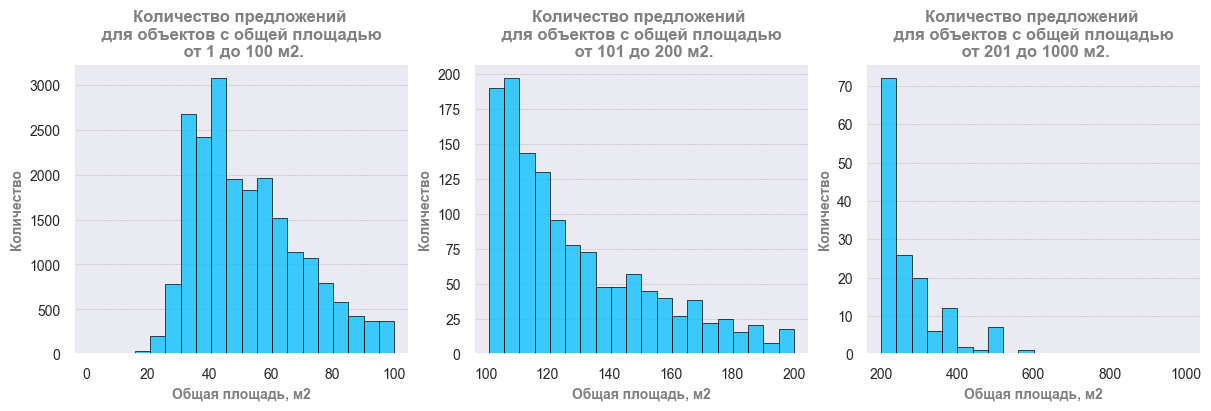

In [658]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height)
sns.set(rc=graph_set)

# Задаем параметры объекта для построения графиков
fig, axs = plt.subplots(h_size, v_size, constrained_layout=True)

for i, item in enumerate(square_range):
    
    # Рисуем график 
    ax = sns.histplot(data['total_area'], 
                      color=bar_color,
                      alpha=.75, 
                      bins=20, 
                      ax=axs[i], 
                      binrange=(item), 
                      linewidth=.5, 
                      edgecolor='black')

    # Настраиваем параметры
    ax.set_title(f'Количество предложений \n для объектов с общей площадью \n от {item[0]} до {item[1]} м2.', \
                 fontdict=fd_12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_ylabel('Количество', fontsize=10, weight='bold', color='gray') 
    ax.set_xlabel('Общая площадь, м2', fontsize=10, weight='bold', color='gray') ;

**Вывод:**

1. Наибольшее количество предложений сконцентрированно в диапазоне от **35-65 м2**, такое распределение обусловлено наличием большого объема квартир советстого периода постройки. Кроме того в новостройках так же велик процент небольших по площади квартир так как они хорошо продаются как конечным покупателям, так и инвесторам.
2. Самый массовый сегмент общей площадью **40-45 м2**, далее с увеличением площади количество предложений снижается, колличество предложений резко сокращается после **250 м2**.

### Жилая площадь

Исследуем параметр жилая площадь

In [659]:
key_features(data[data['living_area'] !=0]['living_area'], 'Жилая площадь', 'м2')

--==<<< Жилая площадь >>>==-- 

Максимум:     409.00 м2.
Минимум:      2.00 м2.
Среднее:      33.48 м2.
Медиана:      30.00 м2.


Построим график, на этапе предварительной обработки данных мы заполняли **0** отстутствующие значения в этом столбце, отбросим их для более точного анализа.

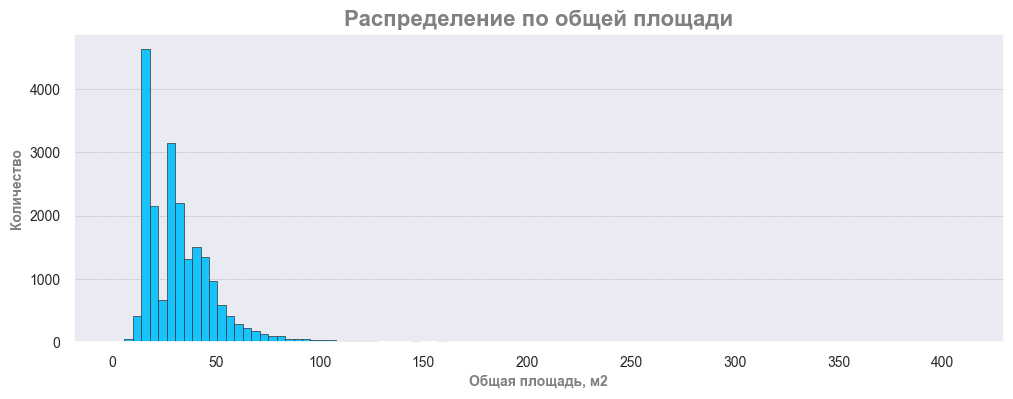

In [660]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height)
sns.set(rc=graph_set)

# Рисуем график 
ax = sns.histplot(data[data['living_area'] != 0]['living_area'], 
                  color=bar_color,
                  alpha=.9, 
                  bins=100, 
                  linewidth=.5, 
                  edgecolor='.2')

# Настраиваем параметры
ax.set_title('Распределение по общей площади', fontdict=fd_16)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_ylabel('Количество', fontsize=10, weight='bold', color='gray') 
ax.set_xlabel('Общая площадь, м2', fontsize=10, weight='bold', color='gray') ;

График очень схож данными по общей площади, для удобства также разделим на три диапазона

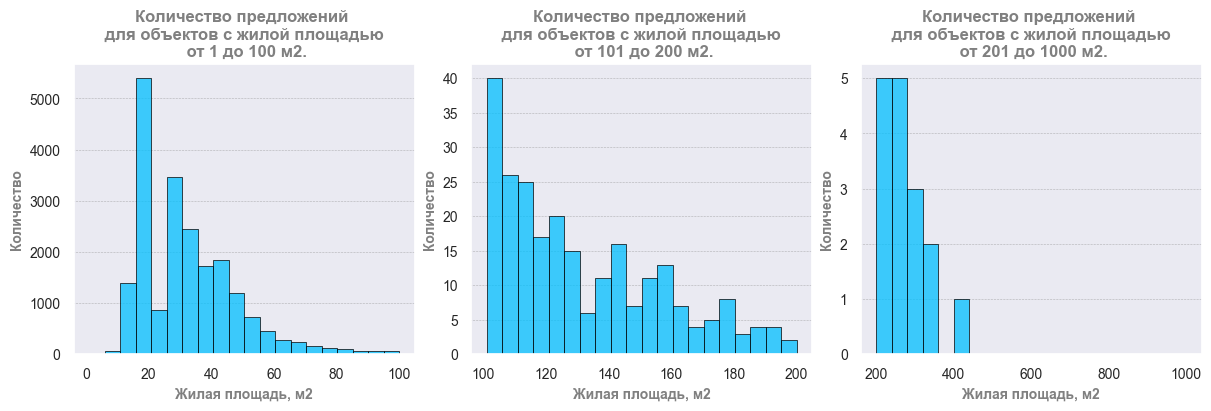

In [661]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height)
sns.set(rc=graph_set)

# Задаем параметры объекта для построения графиков
fig, axs = plt.subplots(h_size, v_size, constrained_layout=True)

for i, item in enumerate(square_range):
    
    # Рисуем график 
    ax = sns.histplot(data[data['living_area'] != 0]['living_area'], 
                      color=bar_color, 
                      alpha=.75, 
                      bins=20, 
                      ax=axs[i], 
                      binrange=(item), 
                      linewidth=.5, 
                      edgecolor='black')

    # Настраиваем параметры
    ax.set_title(f'Количество предложений \n для объектов с жилой площадью \n от {item[0]} до {item[1]} м2.',\
                  fontdict=fd_12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_ylabel('Количество', fontsize=10, weight='bold', color='gray') 
    ax.set_xlabel('Жилая площадь, м2', fontsize=10, weight='bold', color='gray') ;

**Выводы:**

1. Основное предложение квартир сконцентрированно в двух диапазонах **15-20 м2**, и **25-35 м2**, далее с ростом жилой площади количество предложения сокращется.
2. График жилой площади не совпадает по форме с графиком общей площади, возможно это связанно с тем, что на рынке есть тенденция к строительству квартир с большой кухней и небольшой спальней, это было видно на этапе предобработки данных, когда площадь кухни превышала жилую площадь. Это актуально для малогабаритных квартир. Вторая возможная причина это почти **1 800** объектов с **0** жилой площадью, возможно отстуствие этих данных повлияло на форму графика.

### Площадь кухни

Проанализируем параметр площадь кухни

In [662]:
key_features(data[data['kitchen_area'] !=0]['kitchen_area'], 'площадь кухни', 'м2')

--==<<< площадь кухни >>>==-- 

Максимум:     100.00 м2.
Минимум:      7.00 м2.
Среднее:      10.54 м2.
Медиана:      9.00 м2.


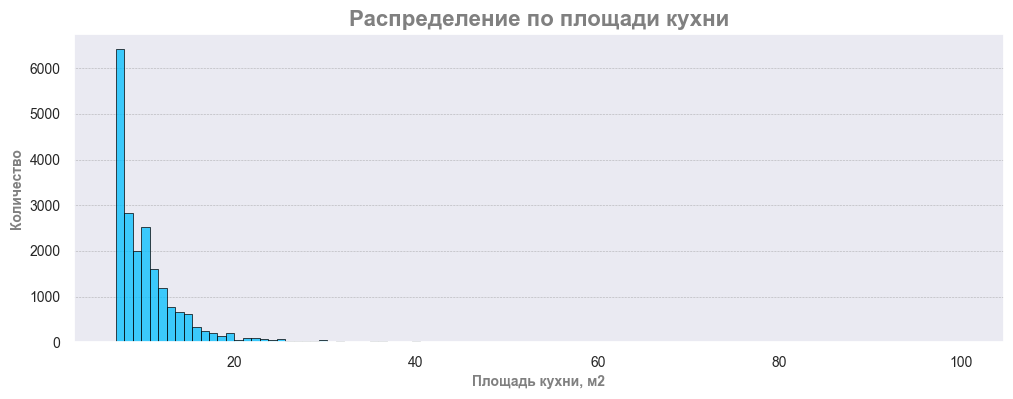

In [663]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height)
sns.set(rc=graph_set)

# Рисуем график настраиваем параметры
ax = sns.histplot(data[data['kitchen_area'] !=0]['kitchen_area'], 
                  color=bar_color,
                  alpha=.75, 
                  bins=100, 
                  linewidth=.5, 
                  edgecolor='black')

ax.set_title('Распределение по площади кухни', fontdict=fd_16)
ax.tick_params(axis='both', labelsize=10)
ax.set_ylabel('Количество', fontsize=10, weight='bold', color='gray') 
ax.set_xlabel('Площадь кухни, м2', fontsize=10, weight='bold', color='gray') ;

In [664]:
# Задаем координаты плиток для графика
h_size = 1
v_size = 2

In [665]:
# Создаем список диапазонов
square_range = [(7, 20), (21, 100)]

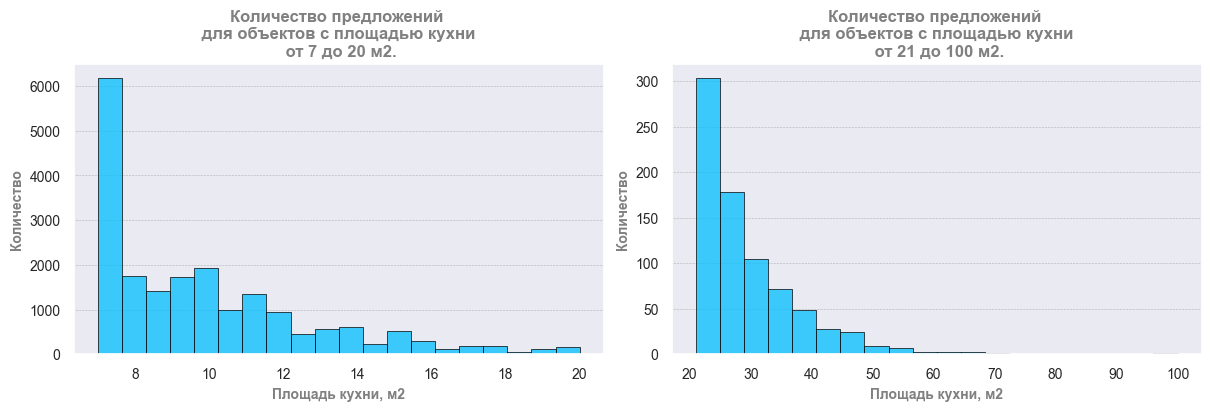

In [666]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height)
sns.set(rc=graph_set)

# Задаем параметры объекта для построения графиков
fig, axs = plt.subplots(h_size, v_size, constrained_layout=True)

for i, item in enumerate(square_range):
    
    # Рисуем график 
    ax = sns.histplot(data[data['kitchen_area'] !=0]['kitchen_area'], 
                      color=bar_color,
                      alpha=.75, 
                      bins=20, 
                      ax=axs[i], 
                      binrange=(item), 
                      linewidth=.5, 
                      edgecolor='black')
    
    # Настраиваем параметры
    ax.set_title(f'Количество предложений \n для объектов с площадью кухни \n от {item[0]} до {item[1]} м2.',\
                  fontdict=fd_12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_ylabel('Количество', fontsize=10, weight='bold', color='gray') 
    ax.set_xlabel('Площадь кухни, м2', fontsize=10, weight='bold', color='gray') ;

**Вывод:**

1. Основная масса предложения сконцентрированна в диапазоне от **7** до **20 м2**, связанно это с тем, что на этапе предобработки данных, аномальные и пропущенные значения были заполненны значением **7 м2**, что и повлияло на конечный результат.
2. По параметру площадь кухни качество данных вызывает сомнения и требует дополнительного анализа.

### Цена объекта

Выполним анализ стоимости объекта

In [667]:
key_features(data['last_price'], 'Стоимость объекта', 'руб')

--==<<< Стоимость объекта >>>==-- 

Максимум:     99 000 000.00 руб.
Минимум:      430 000.00 руб.
Среднее:      5 777 149.47 руб.
Медиана:      4 600 000.00 руб.


In [668]:
# Для читаемости графиков разделим столбец 'last_price' на 1000
data['last_price'] = data['last_price'] / 1000

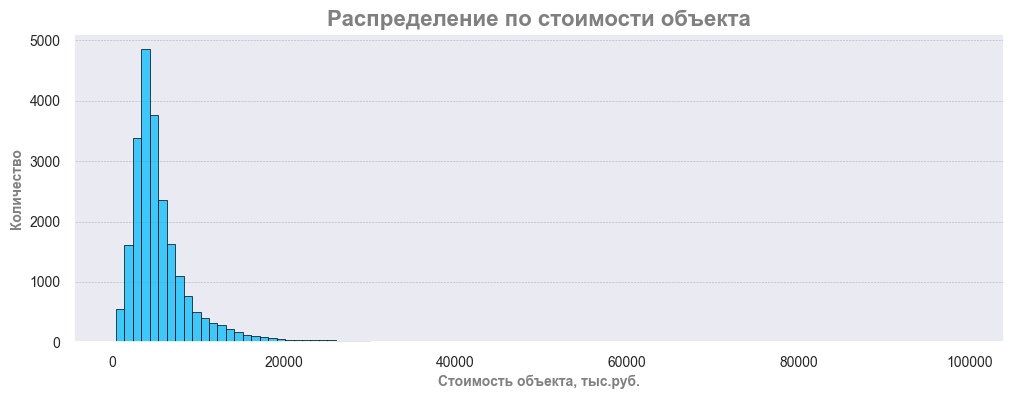

In [669]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height)
sns.set(rc=graph_set)

# Рисуем график настраиваем параметры
ax = sns.histplot(data['last_price'], 
                  color=bar_color, 
                  alpha=.75, 
                  bins=100, 
                  linewidth=.5, 
                  edgecolor='black')

# Настраиваем параметры отображения
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.set_title('Распределение по стоимости объекта', fontdict=fd_16)
ax.tick_params(axis='both', labelsize=10)
ax.set_ylabel('Количество', fontsize=10, weight='bold', color='gray') 
ax.set_xlabel('Стоимость объекта, тыс.руб.', fontsize=10, weight='bold', color='gray') ;

In [670]:
# Задаем размер графика
h_size = 2
v_size = 2

In [671]:
# Создаем список с координатами плиток 
tile_coordinates = [[h, v] for h in range(h_size) for v in range(v_size)]

In [672]:
# Создаем список диапазонов
square_range = [(430, 3000), (3001, 9000), (9001, 15000), (15001, 99000)]

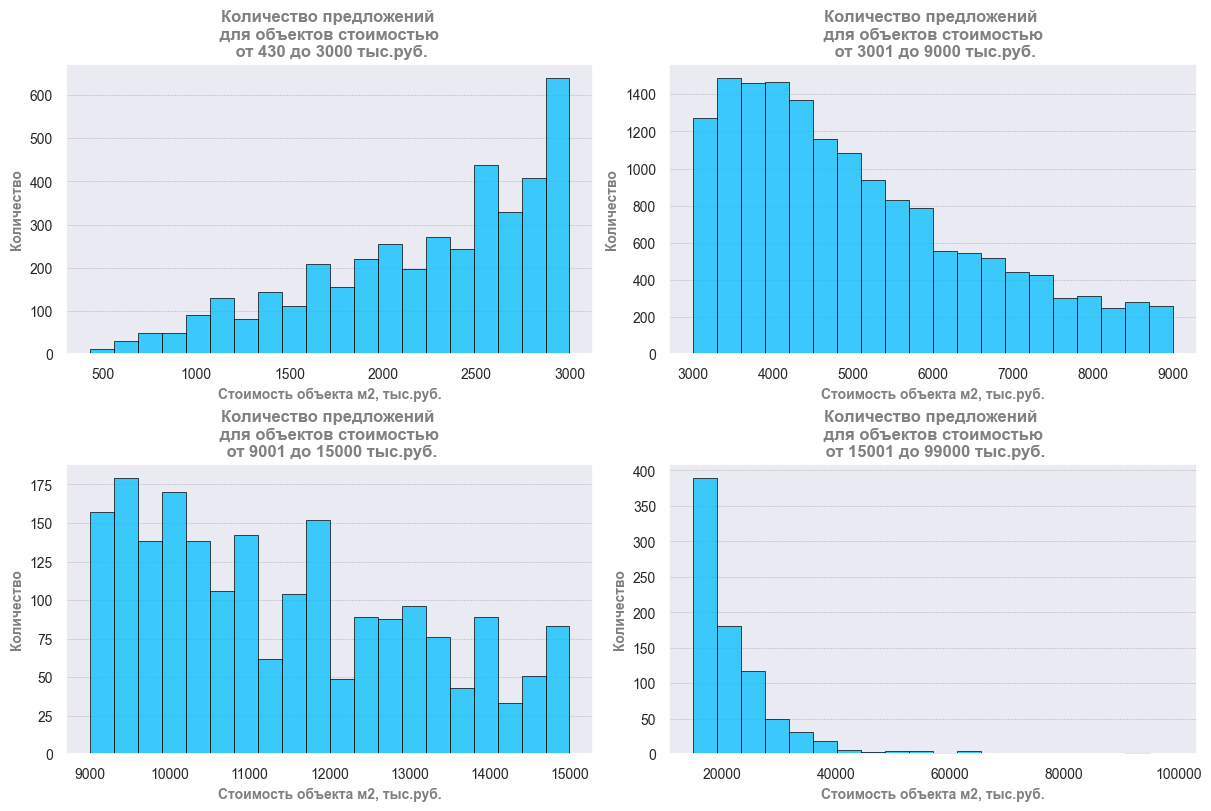

In [673]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height * h_size)
sns.set(rc=graph_set)

# Задаем параметры объекта для построения графиков
fig, axs = plt.subplots(h_size, v_size, constrained_layout=True)

for i, item in enumerate(square_range):

    # Определяем координаты плиток
    pos_x = tile_coordinates[i][0]
    pos_y = tile_coordinates[i][1]
    
    # Рисуем график
    ax = sns.histplot(data['last_price'], 
                      color=bar_color, 
                      alpha=.75, 
                      bins=20,  # type: ignore
                      ax=axs[pos_x][pos_y], 
                      binrange=(item), 
                      linewidth=.5, 
                      edgecolor='black')
    
    # Настраиваем параметры отображения
    ax.set_title(f'Количество предложений \n для объектов стоимостью \n от {item[0]} до {item[1]} тыс.руб.',\
                  fontdict=fd_12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_ylabel('Количество', fontsize=10, weight='bold', color='gray') 
    ax.set_xlabel('Стоимость объекта м2, тыс.руб.', fontsize=10, weight='bold', color='gray') ;

Рассчитаем экстремумы для Санкт-Петербурга и Ленинградской области, выведем эти предожения на экран.

In [674]:
# Вернем датасет в исходное состояние
data['last_price'] = (data['last_price'] * 1000).astype('int32')

In [675]:
spb_last_price_min = data[data['locality_name'] == 'Санкт-Петербург']['last_price'].min()
f'{spb_last_price_min:,} руб.'.replace(',', ' ')

'1 190 000 руб.'

In [676]:
data[(data['last_price'] == spb_last_price_min) & (data['locality_name'] == 'Санкт-Петербург')]

,total_images,last_price,total_area,price_square_meter,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,ad_publish_weekday,ad_publish_month,ad_publish_year,floor_type,city_centers_nearest_km
18813,5,1190000,14.00,85000,2018-07-29,1,2.65,5,11.00,1,...,0,0,0,0,4,6,7,2018,Первый,11


In [677]:
spb_last_price_max = data[data['locality_name'] == 'Санкт-Петербург']['last_price'].max()
f'{spb_last_price_max:,} руб.'.replace(',', ' ')

'99 000 000 руб.'

In [678]:
data[(data['last_price'] == spb_last_price_max) & (data['locality_name'] == 'Санкт-Петербург')]

,total_images,last_price,total_area,price_square_meter,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,ad_publish_weekday,ad_publish_month,ad_publish_year,floor_type,city_centers_nearest_km
6364,20,99000000,488.00,202868,2017-04-09,5,2.95,20,216.00,17,...,1,646,1,368,351,6,4,2017,Другой,4


In [679]:
lo_last_price_min = data[data['locality_name'] != 'Санкт-Петербург']['last_price'].min()
f'{lo_last_price_min:,} руб.'.replace(',', ' ')

'430 000 руб.'

In [680]:
data[(data['last_price'] == lo_last_price_min) & (data['locality_name'] != 'Санкт-Петербург')]

,total_images,last_price,total_area,price_square_meter,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,ad_publish_weekday,ad_publish_month,ad_publish_year,floor_type,city_centers_nearest_km
16724,7,430000,30.40,14144,2019-04-22,1,2.65,2,16.00,1,...,0,0,0,0,0,0,4,2019,Первый,0


In [681]:
lo_last_price_max = data[data['locality_name'] != 'Санкт-Петербург']['last_price'].max()
f'{lo_last_price_max:,} руб.'.replace(',', ' ')

'42 000 000 руб.'

In [682]:
data[(data['last_price'] == lo_last_price_max) & (data['locality_name'] != 'Санкт-Петербург')]

,total_images,last_price,total_area,price_square_meter,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,ad_publish_weekday,ad_publish_month,ad_publish_year,floor_type,city_centers_nearest_km
19450,8,42000000,374.00,112299,2017-04-09,7,2.65,4,239.40,3,...,3,62,3,274,9,6,4,2017,Другой,27


**Выводы:**

1. Самый массовый сегмент на рынке это объекты стоимостью от **3 - 6 млн. руб.** наибольшее предложение находится в диапазоне **3,5 - 4 млн. руб.** как уже отмечалось выше квартиры в этом диапазоне самые востребованые и самые высоколиквидные на рынке.
2. С ростом общей стоимости количество предложений сокращается.
3. Самая дешевая квартира в пределах Санкт-Петербурга стоимостью **1 190 000 руб.** самая дорогая - **99 000 000 руб.**
4. Самая дешевая квартира за пределами Санкт-Петербурга стоимостью **430 000 руб.** в г.Сланцы, самая дорогая **42 000 000 руб.** в г. Пушкин.

### Количество комнат

Рассмотрим показатель количество комнат

In [683]:
key_features(data['rooms'], 'Количество комнат', 'комнат')

--==<<< Количество комнат >>>==-- 

Максимум:     19.00 комнат.
Минимум:      0.00 комнат.
Среднее:      2.04 комнат.
Медиана:      2.00 комнат.


Среднее количество комнат на рынке жилой недвижимости Санкт-Петербурга - **2**, максимальное - **19**, напомним, что квартиры с **0** комнат это квартиры-студии.

In [684]:
rooms_qty = data['rooms'].value_counts()

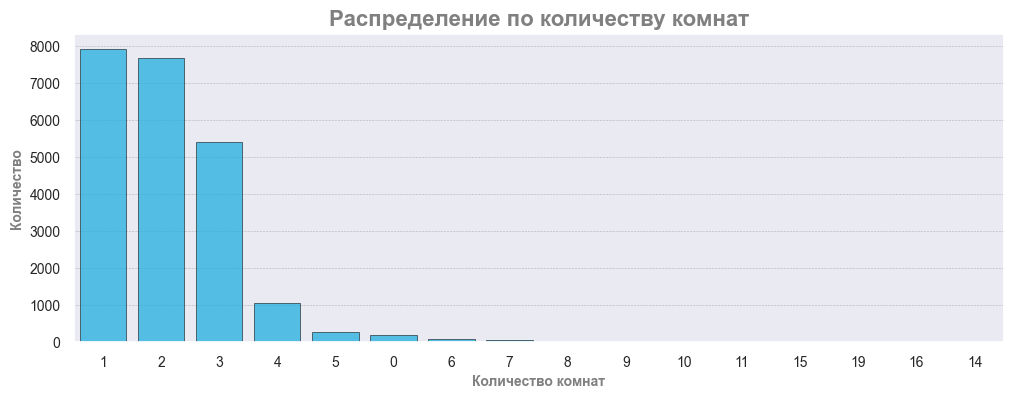

In [685]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height)
sns.set(rc=graph_set)

# Рисуем график
ax = sns.barplot(x=rooms_qty.index,
                 y=rooms_qty,
                 order=rooms_qty.index,
                 color=bar_color,
                 alpha=.75,  
                 linewidth=.5, 
                 edgecolor='black')

# Настраиваем параметры отображения
ax.set_title('Распределение по количеству комнат', fontdict=fd_16)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_ylabel('Количество', fontsize=10, weight='bold', color='gray') 
ax.set_xlabel('Количество комнат', fontsize=10, weight='bold', color='gray') ;

Для наглядности построим гистограмму, отобразим на ней основные сегменты - объекты с количеством комнат от **0** до **5**.

In [686]:
rooms = round(data[data['rooms'] < 6]['rooms'].value_counts(normalize=True) * 100, 2)

In [687]:
# Создадим функцию для нанесения подписей данных на бары гистограммы
def add_value_labels(ax, spacing=5, unit='', digit_cap=True):

    # Для каждого столбца устанавливаем подписи данных
    for bar in ax.patches:

        # Получаем координаты подписей данных
        y_value = bar.get_height()
        x_value = bar.get_x() + bar.get_width() / 2

        # Устанавливаем расстояние между баром и подписью данных
        space = spacing

        # Присваиваем подписи данных значение бара, форматируем
        if digit_cap:
            label = f'{round(y_value, 2):,.2f}{unit}'.replace(',', ' ')
        else:
            label = f'{round(y_value, 2):,.0f}{unit}'.replace(',', ' ')

        # Создаем подпись данных
        ax.annotate(label, (x_value, y_value), xytext=(0, space), 
                    textcoords='offset points', ha='center', va='bottom', fontsize=9)

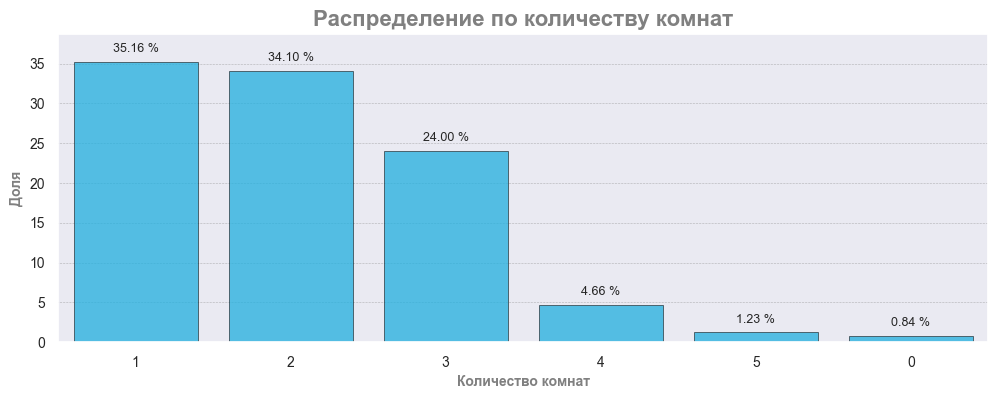

In [688]:
# Рисуем график 
ax = sns.barplot(y=rooms, 
                 x=rooms.index,
                 order=rooms.index,
                 color=bar_color,
                 alpha=.75, 
                 linewidth=.5, 
                 edgecolor='black') 

# Настраиваем параметры отображения
ax.set_title('Распределение по количеству комнат', fontdict=fd_16)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_ylabel('Доля', fontsize=10, weight='bold', color='gray')
ax.set_xlabel('Количество комнат', fontsize=10, weight='bold', color='gray')
add_value_labels(ax, unit=' %', digit_cap=True)
ax.margins(y=0.1) ;

**Выводы:**
1. Основное предложение на рынке Санкт-Петербурга это однокомнатные и двухкомнатные квартиры. Объекты такого типа пользуются наибольшим спросом среди конечных покупателей так и среди тех кто инвестирует в жилую недвижимость.
2. Трехкомнатные квартиры занимают примерно четверть рынка
3. Студии и пятикомнатные квартиры имеют по **1%**.

### Высота потолков

Рассмотрим параметр высота потолка.

In [689]:
data['ceiling_height'].describe()

count              22,702.00
mean                    2.69
std                     0.21
min                     2.00
25%                     2.60
50%                     2.65
75%                     2.70
max                     4.50
Name: ceiling_height, dtype: float64

In [690]:
key_features(data['ceiling_height'], 'Высота потолка', 'м')

--==<<< Высота потолка >>>==-- 

Максимум:     4.50 м.
Минимум:      2.00 м.
Среднее:      2.69 м.
Медиана:      2.65 м.


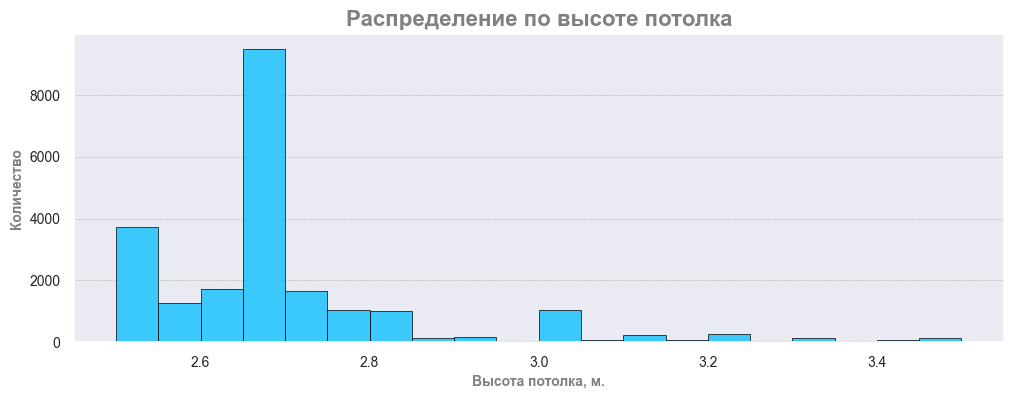

In [691]:
# Рисуем график
ax = sns.histplot(data['ceiling_height'], 
                  color=bar_color, 
                  alpha=.75, 
                  bins=20, 
                  binrange=(2.5, 3.5), 
                  linewidth=.5, 
                  edgecolor='black')

# Настраиваем параметры отображения
ax.set_title('Распределение по высоте потолка', fontdict=fd_16)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_ylabel('Количество', fontsize=10, weight='bold', color='gray') 
ax.set_xlabel('Высота потолка, м.', fontsize=10, weight='bold', color='gray') ;

**Вывод:**

1. Самый массовый сегмент квартир по высоте потолка **2.75 м**. далее ощутимую долю рынка занимают квартиры с высотой потолка **2.5 м**.
2. На рынке так же представлен сегмент квартир с потолками от **3 м**. и выше, ограниченность этого предложения связанна с тем, что такие квартиры более дорогие за счет повышенной себестоимостии строительства и считаются премиальными.

### Этаж квартиры

In [692]:
key_features(data['floor'], 'Количество этажей', 'эт')

--==<<< Количество этажей >>>==-- 

Максимум:     27.00 эт.
Минимум:      1.00 эт.
Среднее:      5.90 эт.
Медиана:      4.00 эт.


In [693]:
floors = data['floor'].value_counts()

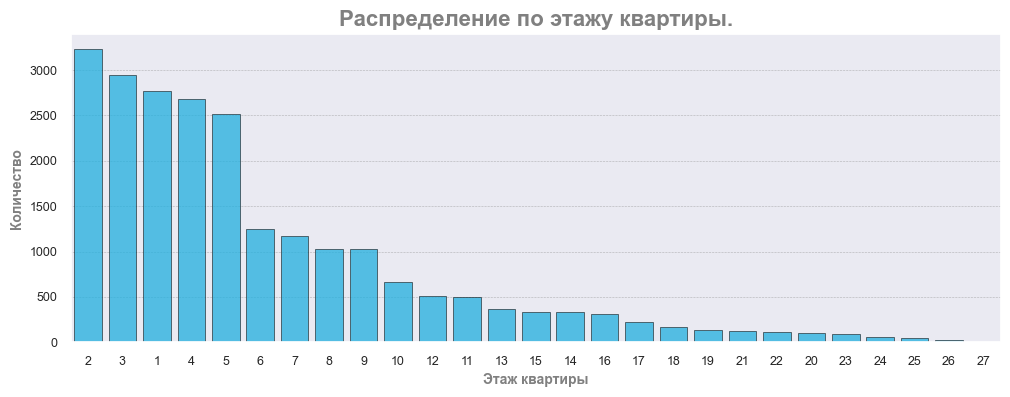

In [694]:
# Рисуем график
ax = sns.barplot(y=floors, 
                 x=floors.index,
                 order=floors.index, 
                 color=bar_color, 
                 alpha=.75, 
                 linewidth=.5, 
                 edgecolor='black')

# Настраиваем график
ax.set_title('Распределение по этажу квартиры.', fontdict=fd_16)
ax.tick_params(axis='both', labelsize=9)
ax.set_ylabel('Количество', fontsize=10, weight='bold', color='gray') 
ax.set_xlabel('Этаж квартиры', fontsize=10, weight='bold', color='gray') ;

**Вывод:**

1. Основной объем предложения на рынке в диапазоне до **9** этажей, после этого уровня количество предложений уменьшается.
2. Наибольшую долю рынка занимют предложения квартир находящихся на **1-5** этажах это связанно с большим количеством **5-ти** этажек в жилом фонде Санкт-Петербурга.

### Тип этажа квартиры

In [695]:
data['floor_type'].value_counts()

floor_type
Другой       16742
Последний     3192
Первый        2768
Name: count, dtype: int64

In [696]:
floors_type = round(data['floor_type'].value_counts(normalize=True) * 100, 2)

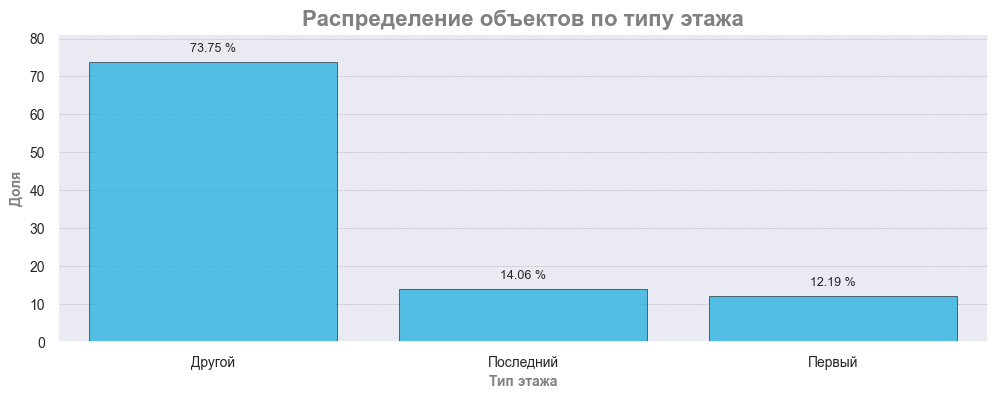

In [697]:
# Рисуем график настраиваем параметры
ax = sns.barplot(y=floors_type, 
                 x=floors_type.index, 
                 color=bar_color, 
                 alpha=.75, 
                 linewidth=.5, 
                 edgecolor='black')

ax.set_title('Распределение объектов по типу этажа', \
             fontdict=fd_16)
ax.tick_params(axis='both', which='major', labelsize=10)
add_value_labels(ax, unit=' %')
ax.margins(y=0.1)
ax.set_ylabel('Доля', fontsize=10, weight='bold', color='gray')
ax.set_xlabel('Тип этажа', fontsize=10, weight='bold', color='gray') ;

**Вывод:**
1. Других этажей ожидаемо больше, чем первых или последних.
2. Последних этажей предлагается на **2%** больше, чем первых. Возможно это связанно с тем, что на последних этажах возникают дополнитлеьные проблемы с протекающими крышами, что является характерной проблемой для Санкт-Петербурга.

### Общее количество этажей в доме

In [698]:
data['floors_total'].describe()

count              22,702.00
mean                   10.71
std                     6.55
min                     1.00
25%                     5.00
50%                     9.00
75%                    16.00
max                    37.00
Name: floors_total, dtype: float64

In [699]:
# Создаем датафрейм для отрисовки графика
floors_total = data['floors_total'].value_counts()

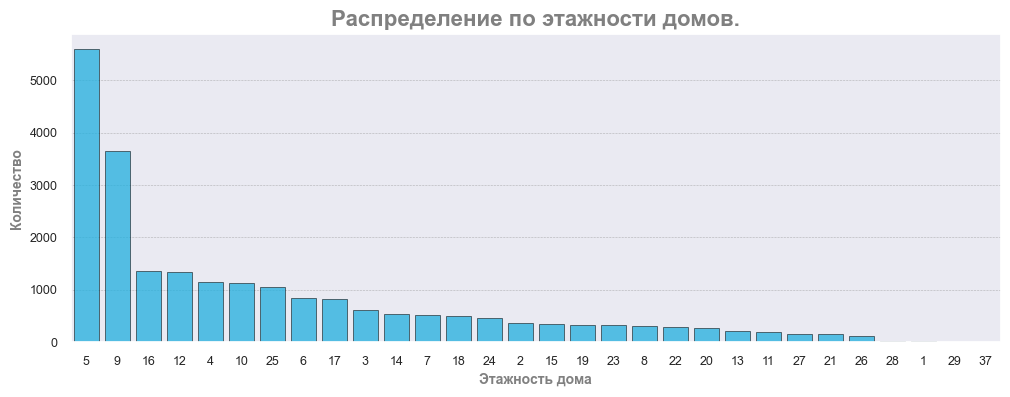

In [700]:
# Рисуем график
ax = sns.barplot(y=floors_total, 
                 x=floors_total.index,
                 order=floors_total.index,
                 color=bar_color, 
                 alpha=.75, 
                 linewidth=.5, 
                 edgecolor='black') 

# Настраиваем график
ax.set_title('Распределение по этажности домов.', fontdict=fd_16)
ax.tick_params(axis='both', labelsize=9)
ax.set_ylabel('Количество', fontsize=10, weight='bold', color='gray') 
ax.set_xlabel('Этажность дома', fontsize=10, weight='bold', color='gray') ;

**Вывод:**

1. Самый массовый сегмент по общей этажности домов это пятиэтажки, возможно это связанно с массовым строительством таких домов в времена СССР.
2. Далее идут сегменты стандартной этажности для многоквартирных домов **9-16-12-4-10**.

### Расстояние до центра города в метрах

In [701]:
data['city_centers_nearest'].describe()

count              22,702.00
mean               10,929.76
std                 9,679.53
min                     0.00
25%                 2,048.00
50%                11,349.50
75%                15,212.50
max                65,968.00
Name: city_centers_nearest, dtype: float64

In [702]:
# Создадим датафрейм для рисования графика
city_center_nearest = data[data['city_centers_nearest'] !=0]

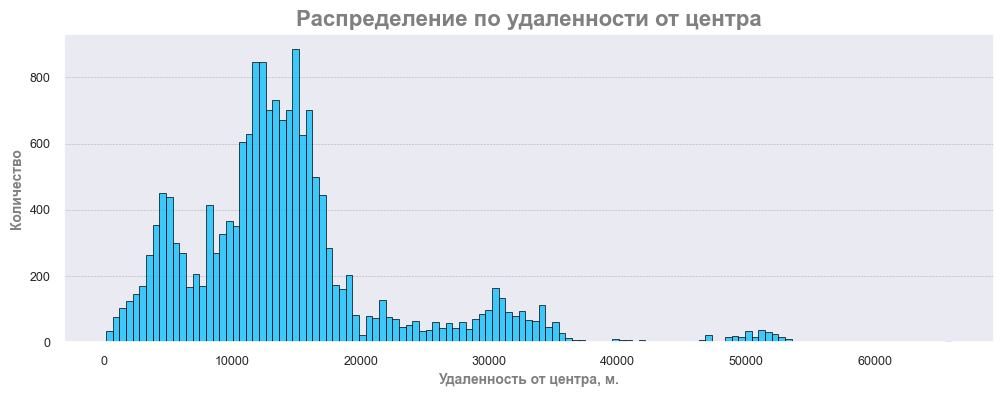

In [703]:
# Рисуем график
ax = sns.histplot(city_center_nearest['city_centers_nearest'], 
                  color=bar_color, 
                  alpha=.75, 
                  linewidth=.5, 
                  edgecolor='black')

# Настраиваем график
ax.set_title('Распределение по удаленности от центра', fontdict=fd_16)
ax.tick_params(axis='both', labelsize=9)
ax.set_ylabel('Количество', fontsize=10, weight='bold', color='gray') 
ax.set_xlabel('Удаленность от центра, м.', fontsize=10, weight='bold', color='gray') ;

**Выводы:**


1. Большинство объектов находится в радиусе **10-20 км**. от центра города такое распределние объясняется наличием т.н. спальных районов, так же существенное количество объектов находится в непосредственной близости к центру.
2. Небольшой подъем количества предложений наблюдается на расстоянии **30 км**. в этом радиусе находятся крупные пригороды Санкт-Петербурга.

### Расстояние до ближайшего аэропорта

Рассмотрим параметр расстояние до аэропорта

In [704]:
# Создадим датафрейм для рисования графика
airport_data = data[data['airports_nearest'] !=0]

In [705]:
# Проведем быстрый анализ
airport_data['airports_nearest'].describe()

count              17,313.00
mean               28,892.78
std                12,719.51
min                 6,450.00
25%                18,471.00
50%                26,890.00
75%                37,412.00
max                84,869.00
Name: airports_nearest, dtype: float64

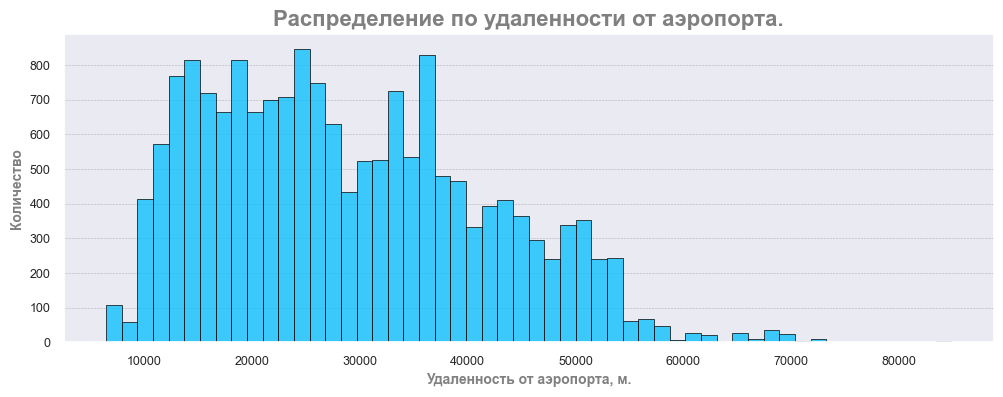

In [706]:
# Рисуем график
ax = sns.histplot(airport_data['airports_nearest'], 
                  color=bar_color, 
                  alpha=.75, 
                  linewidth=.5, 
                  edgecolor='black')

# Настраиваем график
ax.set_title('Распределение по удаленности от аэропорта.', fontdict=fd_16)
ax.tick_params(axis='both', labelsize=9)
ax.set_ylabel('Количество', fontsize=10, weight='bold', color='gray') 
ax.set_xlabel('Удаленность от аэропорта, м.', fontsize=10, weight='bold', color='gray') ;

**Вывод:**

1. Большинство объектов расположены в диапазоне **12-28 км**. от аэропорта, кроме того большая доля объектов расположены на расстоянии **35 км**. от аэропорта.

### Расстояние до ближайшего парка

Выполним анализ параметра расстояние до ближайшего парка

In [707]:
# Создадим датафрейм для рисования графика
park_data = data[data['parks_nearest'] !=0]

In [708]:
# Посмотрим описание данных
park_data['parks_nearest'].describe()

count               7,582.00
mean                  494.18
std                   343.53
min                     1.00
25%                   292.00
50%                   456.00
75%                   614.00
max                 3,190.00
Name: parks_nearest, dtype: float64

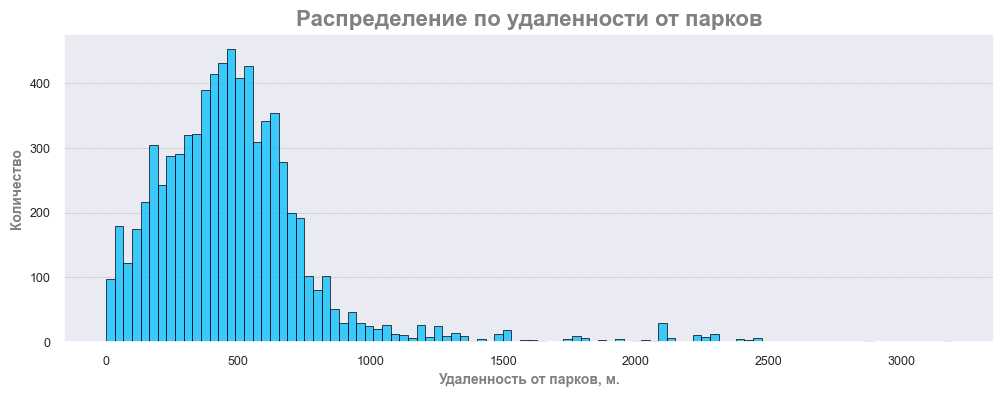

In [709]:
# Рисуем график
ax = sns.histplot(park_data['parks_nearest'], 
                  color=bar_color, 
                  alpha=.75, 
                  linewidth=.5, 
                  edgecolor='black')

# Настраиваем график
ax.set_title('Распределение по удаленности от парков', fontdict=fd_16)
ax.tick_params(axis='both', labelsize=9)
ax.set_ylabel('Количество', fontsize=10, weight='bold', color='gray') 
ax.set_xlabel('Удаленность от парков, м.', fontsize=10, weight='bold', color='gray') ;

In [710]:
# Рассчитаем долю объектов c расстоянием до парка не более 700 м.
park_ratio_main = park_data[park_data['parks_nearest'] <= 700].shape[0] \
    / park_data.shape[0] * 100

# Рассчитаем долю объектов с близлежащими парками от общего количества объектов.
park_ratio = (park_data.shape[0] / data.shape[0]) * 100

In [711]:
print(f'{park_ratio:,.2f}% объектов имеют парки на расстоянии не более 3 км.')
print(f'{park_ratio_main:,.2f}% объектов расположены не далее 700 метров от парков.')

33.40% объектов имеют парки на расстоянии не более 3 км.
85.52% объектов расположены не далее 700 метров от парков.


**Вывод:**
1. Доля объектов с парками от общего количества объектов составляет **33%**. Среднее расстояние до парка **494 м**. максимально **3 190 м**. **85%** объектов расположены не далее **700 м**. от парков.

### День и месяц публикации объявления

Рассмотрим критерий - день и месяц публикации объявления. Построим графики по каждому из критериев.

In [712]:
data[['ad_publish_month', 'ad_publish_weekday']].describe()

,ad_publish_month,ad_publish_weekday
count,"22,702.00","22,702.00"
mean,6.40,2.57
std,3.49,1.79
min,1.00,0.00
25%,3.00,1.00
50%,6.00,3.00
75%,10.00,4.00
max,12.00,6.00


In [713]:
h_size = 1
v_size = 2

In [714]:
columns = ['ad_publish_weekday', 'ad_publish_month']
titles = ['дням недели', 'месяцам']
labels = ['День недели', 'Месяц']

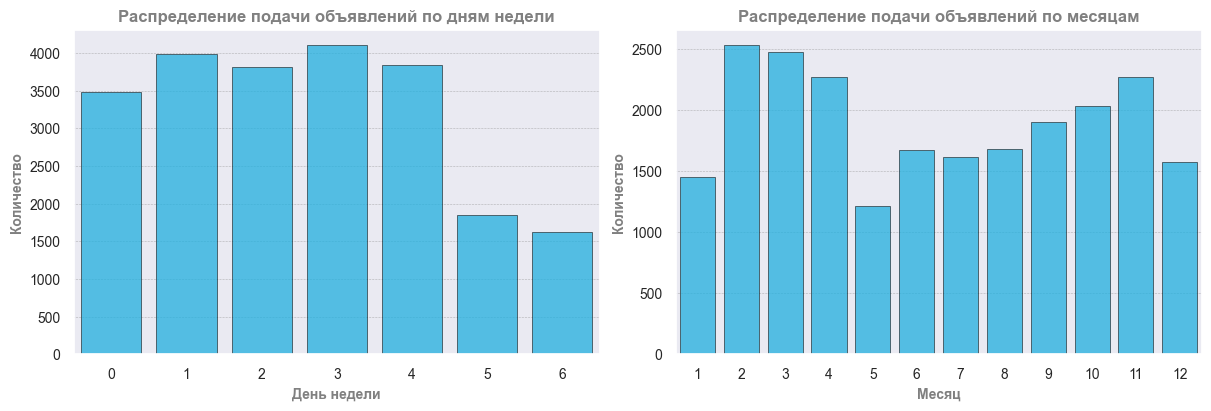

In [715]:
# Задаем параметры объекта для построения графиков
fig, axs = plt.subplots(h_size, v_size, constrained_layout=True)

for i, item in enumerate(columns):
    
    graph_data = data[item].value_counts()
    
    # Рисуем график настраиваем параметры
    ax = sns.barplot(x=graph_data.index,
                     y=graph_data,
                     color=bar_color, 
                     ax=axs[i], 
                     alpha=.75, 
                     linewidth=.5, 
                     edgecolor='black')

    ax.set_title(f'Распределение подачи объявлений по {titles[i]}', \
                 fontdict=fd_12)
    
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_ylabel('Количество', fontsize=10, weight='bold', color='gray')
    ax.set_xlabel(f'{labels[i]}', fontsize=10, weight='bold', color='gray') ;

**Вывод:**


1. Наибольшее количество объявлений подается во вторник, среду, четверг. В пятницу активность начинает спадать. В выходные дни видно резкое сокращение публикаций объявлений, возможно это связанно с тем, что большую долю рекламы размещают юридические лица, соответственно в выходные они не работают. В понедельник деловая активность традиционно низкая, т.к. люди "расскачиваются" после выходных.
2. График подачи объявлений по месяцам демонстрирует наиболее активные периоды публикаций объявлений в период февраль-апрель, в мае активность спадает, вероятно это связанно с тем, что начинается дачный сезон, большое количество выходных дней. Невысокая летняя активность по причине отпусков и затем рост активности осенью, в декабре-январе заметен резкий спад. Снижение количества объявление в декабре возможно связанно с инфляционными ожиданиями и ожиданием роста курса доллара после Нового года. В январе много выходных дней, всплеск подачи объявлений в феврале очень похож на отложенное предложение первых зимних месяцев, что подтверждается нисходящей динамикой в марте-апреле.
3. Таким образом наиболее активный рынок жилой недвижимости в Санкт-Петербурге приходится на период февраль-апрель и сентябрь-ноябрь. В разрезе недели наибольшее количество новых объявлений появляется в середине недели, пик приходится на четверг.

### Длительность экспозиции

Рассмотрим длительность экспозиции, как долго продаются квартиры.

In [716]:
data['days_exposition'].describe()

count              22,702.00
mean                  154.82
std                   210.98
min                     0.00
25%                    22.00
50%                    73.00
75%                   196.00
max                 1,580.00
Name: days_exposition, dtype: float64

In [717]:
# Для начала создадим вспомогателный датафрейм в него войдут строки не равные 0 в столбце'days exposition'
exposition_data = data[data['days_exposition'] != 0]

In [718]:
key_features(exposition_data['days_exposition'], 'Длительность экспозиции', 'д')

--==<<< Длительность экспозиции >>>==-- 

Максимум:     1 580.00 д.
Минимум:      1.00 д.
Среднее:      178.71 д.
Медиана:      94.00 д.


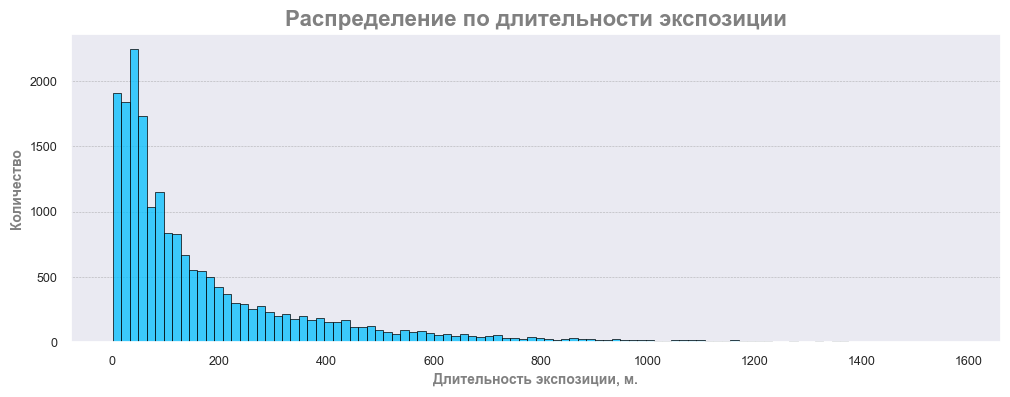

In [719]:
# Рисуем график
ax = sns.histplot(exposition_data['days_exposition'], 
                  bins=100, 
                  color=bar_color, 
                  alpha=.75, 
                  linewidth=.5, 
                  edgecolor='black')

# Настраиваем график
ax.set_title('Распределение по длительности экспозиции', fontdict=fd_16)
ax.tick_params(axis='both', labelsize=9)
ax.set_ylabel('Количество', fontsize=10, weight='bold', color='gray') 
ax.set_xlabel('Длительность экспозиции, м.', fontsize=10, weight='bold', color='gray') ;

Основной объем сделок приходится на период с **1** до **200** дней экспозиции, для удобства разделим на категории.

Для наглядности построим несколько графиков с разными диапзонами длительности продажи.

In [720]:
# Создадим список диапазонов
ranges = [(1, 30), (31, 60), (61, 180), (181, 365), (366, 2000)]

In [721]:
# Зададим конфигурацию плиток для графика
h_size = 5
v_size = 1

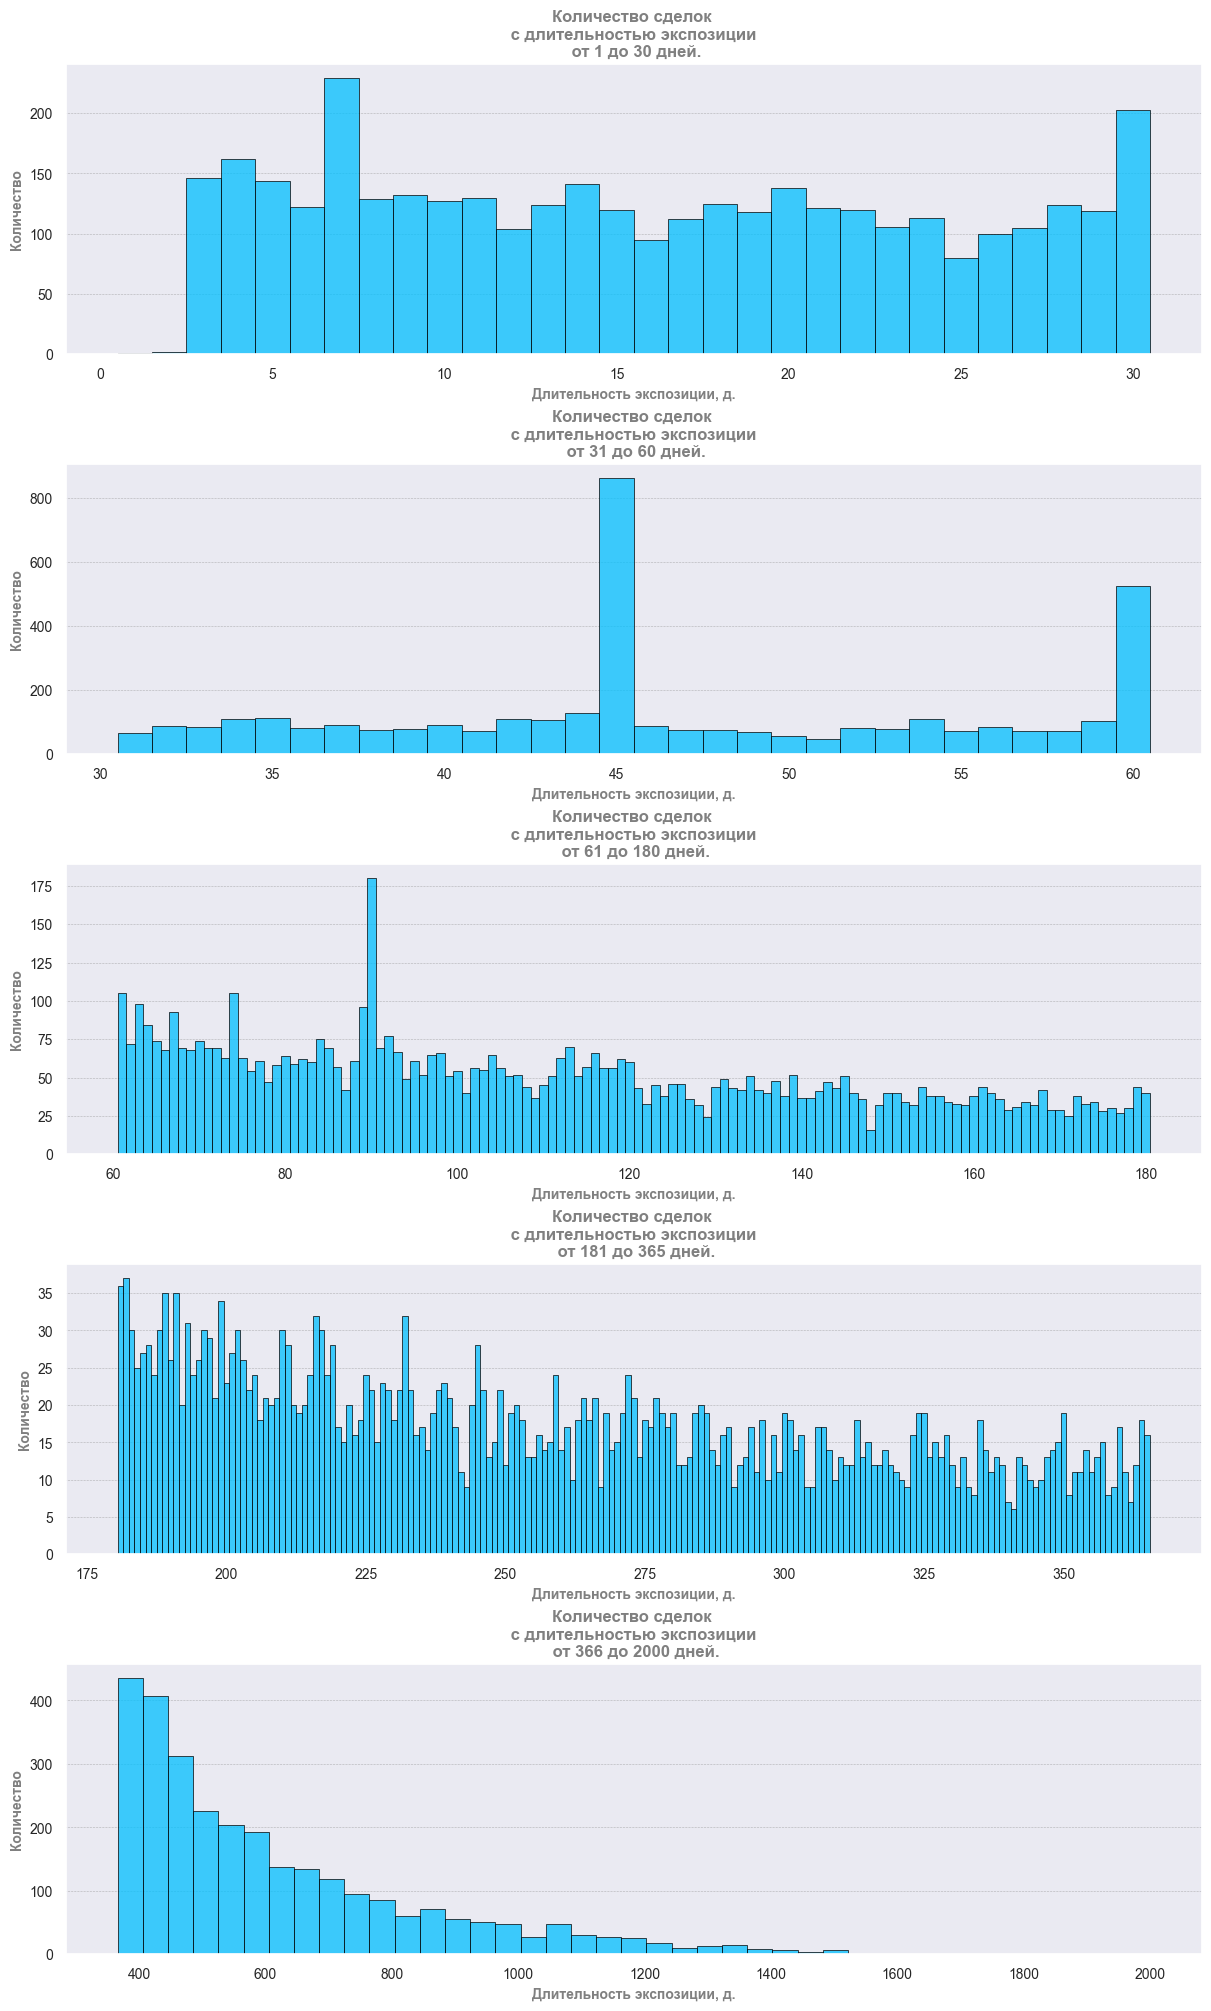

In [722]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height * h_size)
sns.set(rc=graph_set)

# Задаем параметры объекта для построения графиков
fig, axs = plt.subplots(h_size, v_size, constrained_layout=True)

for i, item in enumerate(ranges):
    
    # Рисуем график настраиваем параметры
    ax = sns.histplot(exposition_data['days_exposition'],
                      color=bar_color,
                      alpha=.75,  
                      ax=axs[i],
                      binrange=(item),  
                      discrete=item[0] < 365, 
                      linewidth=.5, 
                      edgecolor='black')

    ax.set_title(f'Количество сделок \n с длительностью экспозиции \n от {item[0]} до {item[1]} дней.', \
                 fontdict=fd_12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_ylabel('Количество', fontsize=10, weight='bold', color='gray') 
    ax.set_xlabel('Длительность экспозиции, д.', fontsize=10, weight='bold', color='gray') ;

На графиках выделяются несколько выбросов на **7**, **30**, **45**, **60** и **90**, **181** дней экспозиции, вероятней всего это связанно с тем, что по прошествии этого срока агрегатор снимает объявления с экспозиции.

In [723]:
end_day = [7, 15, 30, 45, 60, 90, 181]

Уберем из вспомогательного датасета длительность экспозиции с аномальными количествами сделок.

In [724]:
exposition_data = exposition_data[~exposition_data['days_exposition'].isin(end_day)]

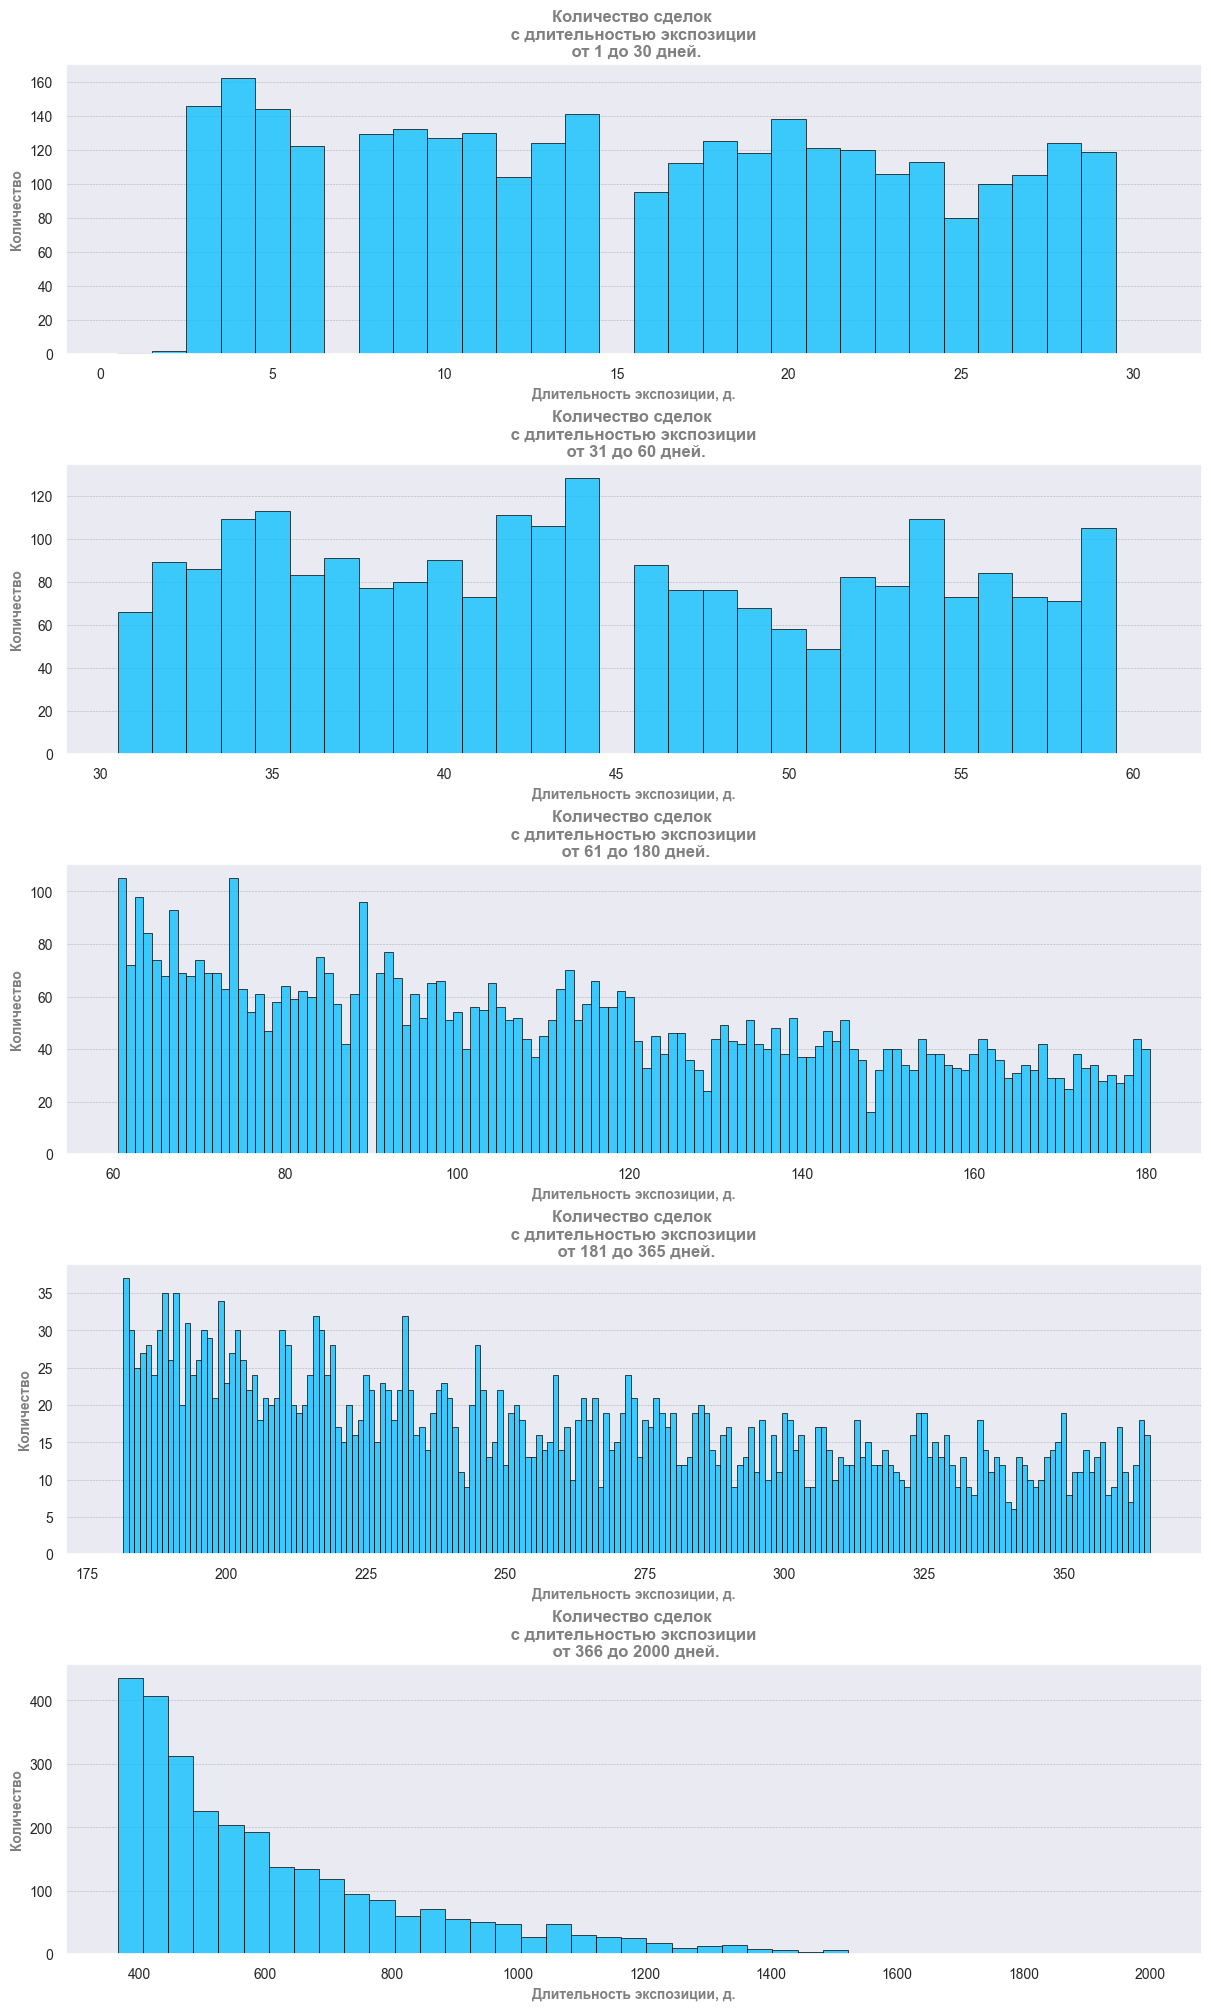

In [725]:
# Задаем параметры объекта для построения графиков
fig, axs = plt.subplots(h_size, v_size, constrained_layout=True)

for i, item in enumerate(ranges):
    
    # Рисуем график настраиваем параметры
    ax = sns.histplot(exposition_data['days_exposition'],
                      color=bar_color,
                      alpha=.75,  
                      ax=axs[i],
                      binrange=(item),  
                      discrete=item[0] < 365, 
                      linewidth=.5, 
                      edgecolor='black')

    ax.set_title(f'Количество сделок \n с длительностью экспозиции \n от {item[0]} до {item[1]} дней.', \
                 fontdict=fd_12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_ylabel('Количество', fontsize=10, weight='bold', color='gray') 
    ax.set_xlabel('Длительность экспозиции, д.', fontsize=10, weight='bold', color='gray') ;

**Выводы:**


1. На графиках выделяются несколько выбросов на **7**, **30**, **45**, **60** и **90**, **180** дней экспозиции, вероятней всего это связанно с тем, что по прошествии этого срока агрегатор снимает объявления с экспозиции.
2. В диапазоне от **1** до **7** дней. Покупка недвижимости это не эмоциональное решение и требует подготовки: просмотр объекта, оформление документов, получения решения по ипотеке от банка при необходимости, и время на принятие решения. Предположим, что такие сделки возможны когда у объекта продажи очень привлекательная цена, либо потенциальный покупатель нашел квартиру "своей мечты", либо продавцу срочно необходимы деньги, либо это крайне редкое встречающееся предложение на рынке и при всех этих возможных условиях у обеих строн сделки необходмый пакет документов находится на руках. Отдельно стоит отметить, что при такой быстрой продаже очень велика вероятность мошеннеческих сделок, у покупателя нет времени для анализа всех факторов и изучение объекта на скрытые недостатки и проверки юридической чистоты. Несмотря на эти факторы объем сделок в первую неделю публикации объявления достаточно высок.
2. В диапазоне от **8** до **30** дней экспозиции сконцентрированно основное количество сделок. Это можно обусловить уже более сбалансированной относительно рынка стоимостью объекта. Возможно здесь покупатель более детально подойдет к оценке предложения, изучит рынок и т.д.
3. В диапазоне от **30** до **60** дней экспозиции можно отметить, что цены на объекты уже скорее всего рыночные или выше рынка, другими слова ценность объекта ниже его цены, однако количество сделок все еще достаточно высоко.
4. Все что выше **60** дней это скорее уже долгая продажа, количество сделок в это м диапазоне сокращается, продавец никуда не торопиться и ждет своего покупателя, скорее всего в этом диапазоне продатся т.н. инвестиционные объекты, либо объекты имеющие какие-либо подводные камни, либо проблемы с документами и т.д.

Таким образом быстрой продажей можно сделки прошедшие в первую неделю после публикации объявления, стандартным сроком продажи квартир можно назвать диапазон от **8-60** дней, более длительный срок можно назвать долгой продажей.

### Факторы влияния на стоимость объекта

Рассмотрим основные факторы влияния на конечную стоимость объекта. Для этого создадим вспомогательный датасет.

In [726]:
explore_factor_data = data[['total_images',
                            'last_price',
                            'price_square_meter',
                            'ceiling_height',
                            'total_area',
                            'living_area',
                            'kitchen_area',
                            'rooms',
                            'floor_type',
                            'days_exposition',
                            'ad_publish_weekday',
                            'ad_publish_month',
                            'ad_publish_year']]

In [727]:
explore_factor_data.describe()

,total_images,last_price,price_square_meter,ceiling_height,total_area,living_area,kitchen_area,rooms,days_exposition,ad_publish_weekday,ad_publish_month,ad_publish_year
count,"22,702.00","22,702.00","22,702.00","22,702.00","22,702.00","22,702.00","22,702.00","22,702.00","22,702.00","22,702.00","22,702.00","22,702.00"
mean,9.85,"5,777,149.47","95,850.47",2.69,58.50,30.86,9.56,2.04,154.82,2.57,6.40,"2,017.38"
std,5.64,"4,556,074.01","32,072.11",0.21,31.41,21.31,5.67,1.05,210.98,1.79,3.49,1.03
min,0.00,"430,000.00","14,144.00",2.00,12.00,0.00,0.00,0.00,0.00,0.00,1.00,"2,014.00"
25%,6.00,"3,400,000.00","77,436.00",2.60,40.00,17.80,7.00,1.00,22.00,1.00,3.00,"2,017.00"
50%,9.00,"4,600,000.00","94,960.00",2.65,51.00,29.00,8.80,2.00,73.00,3.00,6.00,"2,017.00"
75%,14.00,"6,600,000.00","113,207.00",2.70,68.00,40.00,11.15,3.00,196.00,4.00,10.00,"2,018.00"
max,50.00,"99,000,000.00","219,111.00",4.50,590.00,409.00,100.00,19.00,"1,580.00",6.00,12.00,"2,019.00"


В столбцах `living_area` присутствуют нулевые значения, они туда были добавлены для сохранения данных в других столбцах, для решения данной задачи предлагается эти строки ислючить, что бы **0** не влияли на конечный результат исследования.

In [728]:
# Корректируем вспомогательный датасет, удаляем нулевый строки со столбца с жилой площадью, сбрасываем индексы
explore_factor_data = explore_factor_data[explore_factor_data['living_area'] != 0]
explore_factor_data = explore_factor_data.reset_index(drop=True)

In [729]:
# Создаем функцию для перевода строчных типов этажей в цифровой для дальнейшего использования этого параметра 
# в корреляционной матрице
def change_floor_type(df):
    if df['floor_type'] == 'Первый':
        return 1
    elif df['floor_type'] == 'Последний':
        return 0
    else:
        return 2

In [730]:
# Заменяем строковый тип этажа на цифровой
explore_factor_data['floor_type'] = explore_factor_data.apply(change_floor_type, axis=1)

In [731]:
# Проверяем результат
explore_factor_data.head(5)

,total_images,last_price,price_square_meter,ceiling_height,total_area,living_area,kitchen_area,rooms,floor_type,days_exposition,ad_publish_weekday,ad_publish_month,ad_publish_year
0,20,13000000,120370,2.70,108.00,51.00,25.00,3,2,0,3,3,2019
1,7,3350000,82920,2.65,40.40,18.60,11.00,1,1,81,1,12,2018
2,10,5196000,92785,2.65,56.00,34.30,8.30,2,2,558,3,8,2015
3,2,10000000,100000,3.03,100.00,32.00,41.00,2,2,121,1,6,2018
4,10,2890000,95065,2.65,30.40,14.40,9.10,1,2,55,0,9,2018


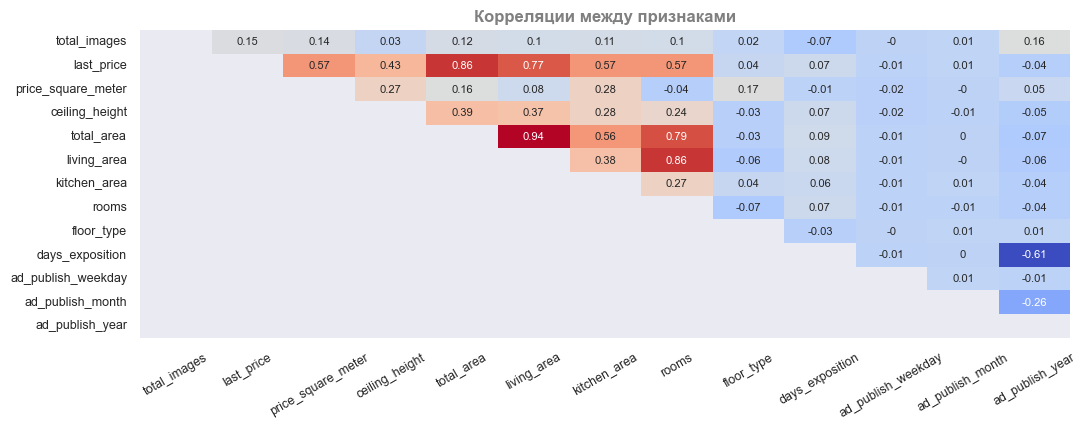

In [732]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height)
sns.set(rc=graph_set)

# Выбираем верхний треугольник матрицы
triangle = np.tril(explore_factor_data.corr())

# Строим тепловую карту корреляционной матрицы
ax = sns.heatmap(round(explore_factor_data.corr(),2), 
                 annot=True, 
                 cmap='coolwarm',
                 mask=triangle, 
                 annot_kws={'fontsize':8},
                 cbar=False)

ax.tick_params(axis='x', rotation=30)
ax.tick_params(axis='both', labelsize=9)
ax.grid(False)
ax.set_title(f'Корреляции между признаками', fontdict=fd_12)
ax.set_ylabel('', fontsize=8) 
ax.set_xlabel('', fontsize=10) ;

Тепловая карта наглядно демонстрирует что наибольшее влияние на стоимость объета влияют общая и жилая площадь.

Построим диаграммы рассеивания для каждого параметра.

In [733]:
# Для удобства чтения графиков разделим столбец общей стоимости на 1000
explore_factor_data['last_price'] = explore_factor_data['last_price'] / 1000

In [734]:
# Создаем списки для отрисовки графиков
areas = ['total_area', 'living_area']
titles = ['общей площадью','жилой площадью']
x_labels = ['Общая площадь', 'Жилая площадь']

In [735]:
# Задаем размер координатной сетки для графиков
h_size = 1
v_size = 2

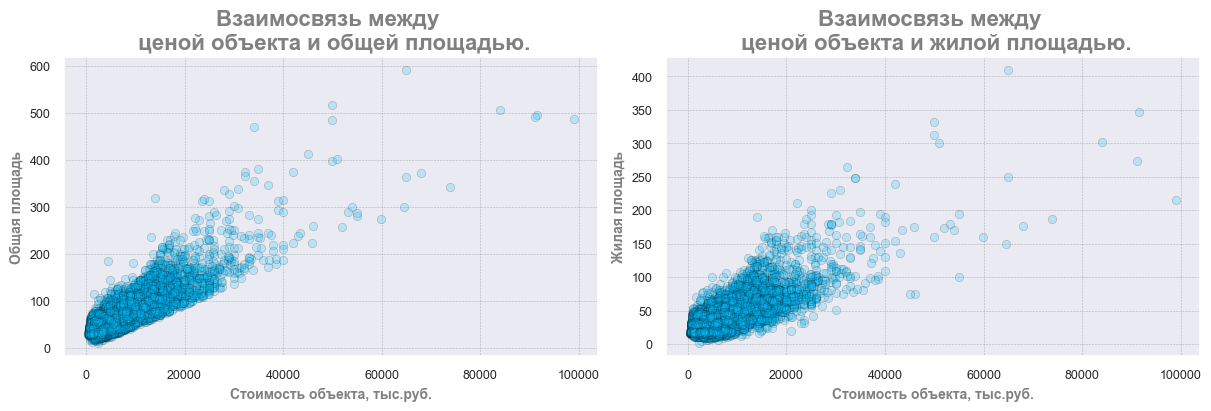

In [736]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height * h_size)
graph_set['axes.grid.axis'] = 'both'
sns.set(rc=graph_set)

# Задаем параметры объекта для построения графиков
fig, axs = plt.subplots(h_size, v_size, constrained_layout=True)

for i, area in enumerate(areas):

    # Рисуем график
    ax = sns.scatterplot(x=explore_factor_data['last_price'],
                         y=explore_factor_data[area], ax=axs[i], 
                         color=bar_color, 
                         alpha=.2, 
                         linewidth=.5, 
                         edgecolor='black') 

    ax.get_xaxis().get_major_formatter().set_scientific(False)

    # Настраиваем график
    ax.set_title(f'Взаимосвязь между \n ценой объекта и {titles[i]}.', fontdict=fd_16)
    ax.tick_params(axis='both', labelsize=9)
    ax.set_ylabel(x_labels[i], fontsize=10, weight='bold', color='gray') 
    ax.set_xlabel('Стоимость объекта, тыс.руб.', fontsize=10, weight='bold', color='gray') ;

**Выводы:**
1. Наибольшей корреляцией с конечной ценой объекта обладает параметр общая площадь, чем больше квартира тем дороже объект.
2. Обращает на себя внимание форма графика общей площади, квартиры с маленькой площадью могу быть дорогими, а квартиры с большой площадью никак не могут быть дешевыми, на графике жилой площади такой зависимости не наблюдается.

Применение коэффициента корреляции Пирсона к типу этажа, дню недели, году, и месяцу - не эффективно, т.к. цена квартиры зависит от них не линейно. Построим гистограммы для оценки этих параметров.

In [737]:
# Задаем размер координатной сетки для графиков
h_size = 2
v_size = 2

In [738]:
features = ['floor_type', 'ad_publish_weekday', 'ad_publish_month', 'ad_publish_year']
titles = ['типом этажа', 
          'днем недели публикации объявления', 
          'месяцем публикации объявления', 
          'годом публикации объявления']
x_labels = ['Тип этажа', 'День недели', 'Месяц', 'Год']

In [739]:
# Создаем список с координатами плиток 
tile_coordinates = [[h, v] for h in range(h_size) for v in range(v_size)]

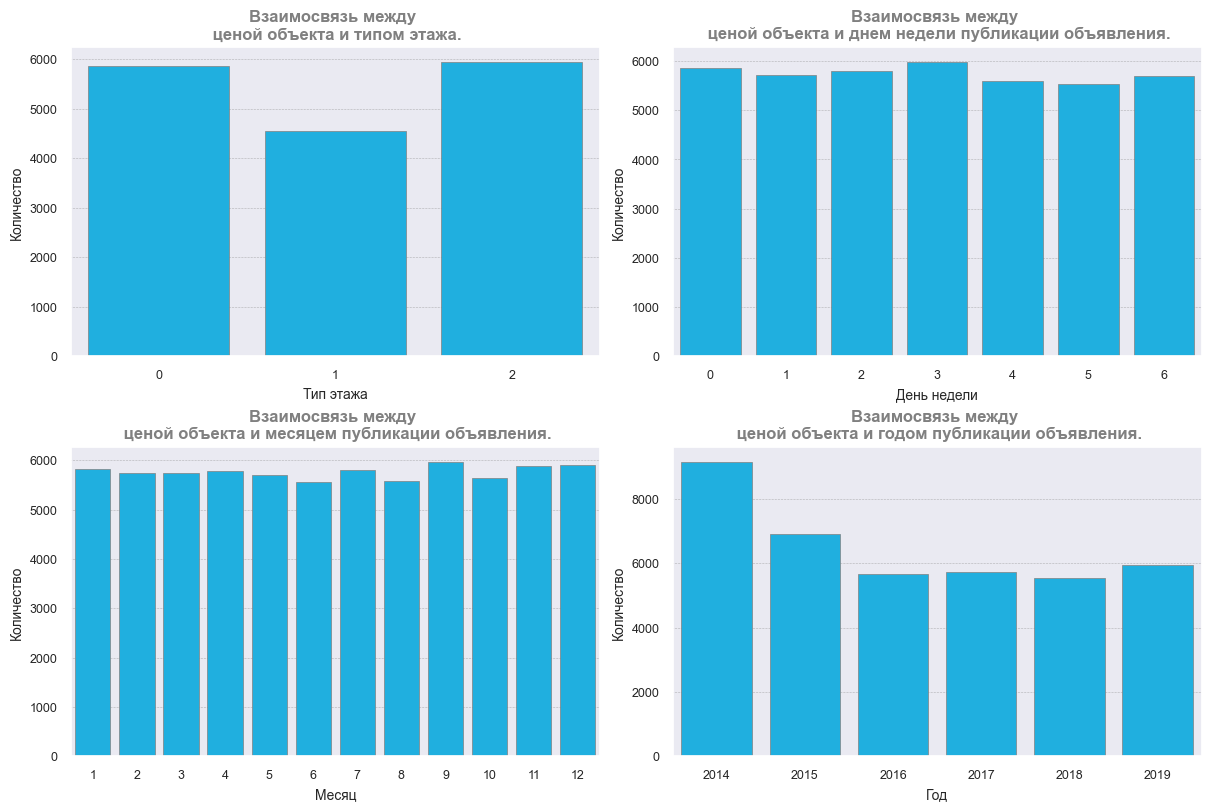

In [740]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height * h_size)
graph_set['axes.grid.axis'] = 'y'
sns.set(rc=graph_set)

# Задаем параметры объекта для построения графиков
fig, axs = plt.subplots(h_size, v_size, constrained_layout=True)

for i, item in enumerate(features):

    # Определяем координаты плиток для каждого металла
    pos_x = tile_coordinates[i][0]
    pos_y = tile_coordinates[i][1]

    # Рисуем график
    ax = sns.barplot(x=explore_factor_data[item], 
                     y=explore_factor_data['last_price'],  
                     estimator='mean', 
                     ax=axs[pos_x][pos_y],
                     color=bar_color, 
                     linewidth=.5, 
                     edgecolor='.5', 
                     errorbar=None) 

    # Настраиваем график
    ax.set_title(f'Взаимосвязь между \n ценой объекта и {titles[i]}.', \
                fontdict=fd_12)
    ax.tick_params(axis='both', labelsize=9)
    ax.set_ylabel('Количество', fontsize=10)
    ax.set_xlabel(x_labels[i], fontsize=10) ;

**Выводы:**
1. По типу этажа наблюдается зависимость у квартир расположенных на первом этаже, средняя цена на такие объекты ниже примерно на **1,2 млн. руб.** относительно объектов расположенных на последних и других этажах.
2. По дню недели зависимости между днем подачи объявления и конечной стоимостью квартир не наблюдается, однако отдельно стоит отметить, что для объявлений поданных в четверг выявлена наиболее высокая средняя цена, что сочетается с данными о том, что в этот день недели подается наибольшее количество объявлений.
3. По месяцам явной зависимости не наблюдается, выделяется сентябрь с наиболее высокой средней стоимостью квартиры, в остальные месяцы цены на объекты находятся в диапазоне **5.3-5.8 млн. руб**.
4. График в годовом разрезе демонстрирует высокую стоимость объектов в 2014 и 2015 годах и стабильную цену в период с 2016 по 2019г. Выглядит 
подозрительно т.к. стоимость жилья в эти периоды стабильно росла.


Самая ранняя дата в датасете конец ноября 2014, т.е. данных немного, возможно этим и объясняется такой результат, проверим, сколько всего объявлений подавали по годам.

In [741]:
explore_factor_data.groupby('ad_publish_year')['last_price'].count()

ad_publish_year
2014     118
2015    1035
2016    2528
2017    7328
2018    7307
2019    2611
Name: last_price, dtype: int64

Для 2014 года данных действительно не много, а вот в 2015 данных достаточно, для подтверждения тендеции составим график по стоимости квадратного метра.

In [742]:
# Задаем размер координатной сетки для графиков
h_size = 1
v_size = 3

In [743]:
# Создадим списки признаков и заголовков графиков  
titles = ['стоимостью м2', 
          'общей площадью', 
          'стоимостью объекта']
features =['price_square_meter', 'total_area', 'last_price']

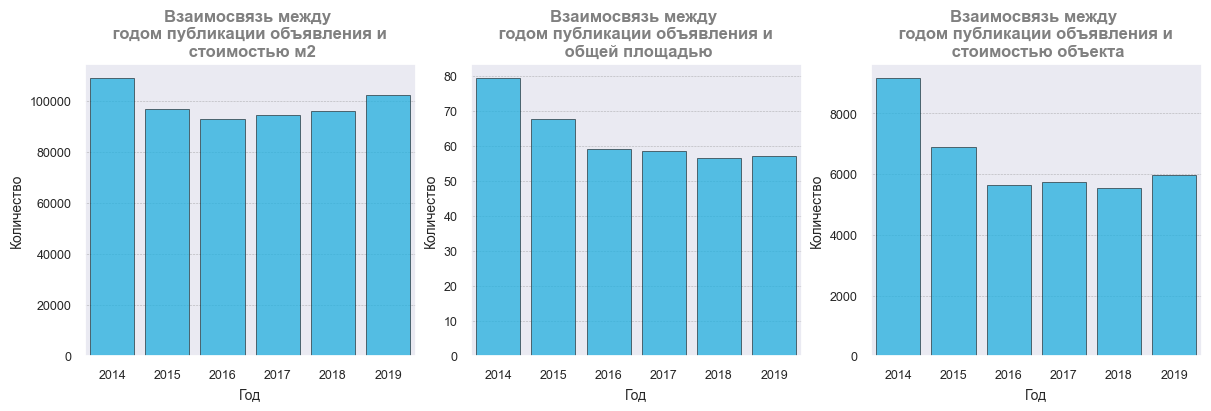

In [744]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height * h_size)
sns.set(rc=graph_set)

# Задаем параметры объекта для построения графиков
fig, axs = plt.subplots(h_size, v_size, constrained_layout=True)

for i, item in enumerate(features):

    # Определяем координаты плиток
    pos_y = tile_coordinates[i][1]
    
    # Рисуем график
    ax = sns.barplot(data=explore_factor_data,
                     x='ad_publish_year', 
                     y=item, 
                     estimator='mean', 
                     ax=axs[i], 
                     color=bar_color, 
                     alpha=.75, 
                     linewidth=.5, 
                     edgecolor='black', 
                     errorbar=None)


    # Настраиваем график
    ax.set_title(f'Взаимосвязь между \n годом публикации объявления и \n {titles[i]}', \
                fontdict=fd_12)
    ax.tick_params(axis='both', labelsize=9)
    ax.set_ylabel('Количество', fontsize=10) 
    ax.set_xlabel('Год', fontsize=10) ;


Тендеция по стоимости м2 выглядит иной, высокая стоимость в **2014 г**., спад до **2016 г**. и затем востановление в **2019 г**. Такую динамику можно объяснить политическим факторами, в **2014 г**. блок западных стран ввел санкции против РФ в ответ на признане Крыма и рынку недвижимости потребовалось некоторое время на адаптацию к новым условиям. Другая причина может быть в том, что в **2014-2015** чаще продавались объекты с большой общей площадью.

В **2014-2015 гг**. средняя площадь продаваемых объектов была выше, что оказало влияние на среднюю общую стоимость объекта.

**Выводы:**
       
1. По типу этажа наблюдается зависимость у квартир расположенных на первом этаже, средняя цена на такие объекты ниже примерно на **1 млн. руб.** относительно объектов расположенных на последних и других этажах.
2. По дню недели зависимости между днем подачи объявления и конечной стоимостью квартир не наблюдается, однако отдельно стоит отметить, что для объявлений поданных в четверг выявлена наиболее высокая средняя цена, что сочетается с данными о том, что в этот день недели подается наибольшее количество объявлений.
3. По месяцу публикации зависмостей не наблюдается, во все месяцы чредние цены колеблются в диапазоне **5.3-5.8 млн. руб**.
4. По году публикации зависимость подтверждена отчасти, основной причиной более высокой стоимости объектов в **2014-2015 гг**. можно назвать высокую среднюю общую площадь продаваемых объектов.

### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [745]:
# Создаем вспомогательный датафрейм с объектами находящимися за пределами Санкт-Петербурга
lo_data = data[data['locality_name'] != 'Санкт-Петербург']

# Создаем сводную таблицу с названиями населенных пунктов, количеством объявлений и средней ценой за м2
lo_data_pivot = lo_data.groupby('locality_name').agg(ad_count=('price_square_meter', 'count'), 
                                                     mean_price = ('price_square_meter', 'mean')).\
                                                     sort_values(by=['ad_count', 'mean_price'], ascending=False).head(10)

In [746]:
# Округляем цену, переводим в формат числа
lo_data_pivot['mean_price'] = lo_data_pivot['mean_price'].apply('{0:.0f}'.format).astype('int32')

In [747]:
# Переводим в формат датафрема
lo_data_pivot = lo_data_pivot.reset_index()

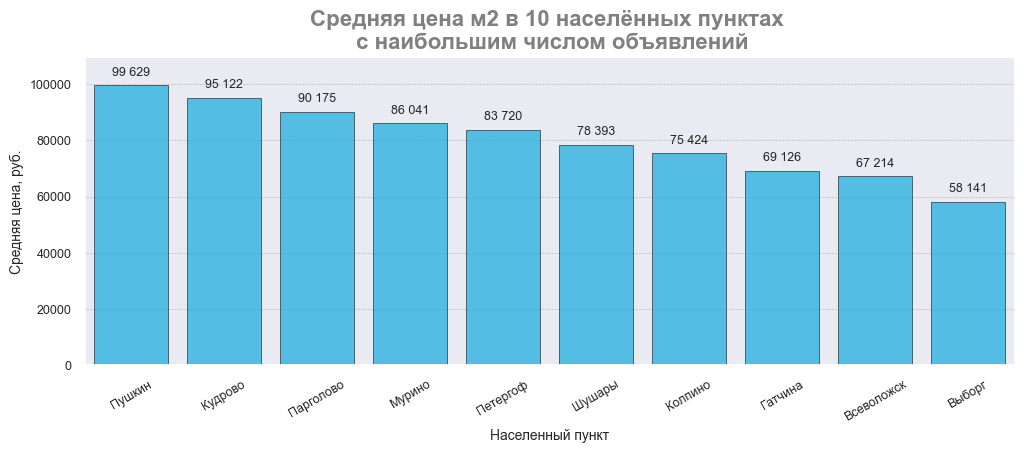

In [755]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height)
sns.set(rc=graph_set)

# Строим график
ax = sns.barplot(data=lo_data_pivot.sort_values(by='mean_price', ascending=False), 
                 x='locality_name', 
                 y='mean_price', 
                 color=bar_color,
                 alpha=.75, 
                 linewidth=.5, 
                 edgecolor='black', 
                 errorbar=None)

# Настраиваем график
ax.tick_params(axis='x', rotation=30)
ax.set_title(f'Средняя цена м2 в 10 населённых пунктах \n с наибольшим числом объявлений', \
                fontdict=fd_16)
ax.tick_params(axis='both', labelsize=9)
ax.set_ylabel('Средняя цена, руб.', fontsize=10)
add_value_labels(ax, digit_cap=False)
ax.margins(y=0.1)
ax.set_xlabel('Населенный пункт', fontsize=10) ;

**Вывод:** 

1. Наиболее высокая средняя цена за м2, чуть менее **100 000 руб**. наблюдается в г.Пушкин, обусловлено это наличием большого количества памятников архитектуры и парков, коротким расстоянием до города-памятника Павловск и аэропорта, а также комфортной доступностью до Санкт-Петербурга.

2. Самая низкая средняя цена в г.Выборг, несмотря на то, что в Выборге также много памятников архитектуры, город находится на расстоянии около **140 км**. от границы Санкт-Петербурга.

3. Кроме того высокая стоимость м2 наблюдается в д.Кудрово, этот город-спутник активно застаривается и находится внутри КАД, рядом есть мега-молл Мега, магазин IKEA.

4. В п.Парголово также высокая средняя стоимость недвижимости, этот северный район Санкт-Петербурга активно развивается и тоже находится внутри КАД, кроме того имеется удобная транспортная доступность к Курортному району

### Стоимость километра до центра города

Рассчитаем медианную стоимость м2 по каждому километру удаления от центра города. Выбор медианы обусловлен меньшей зависмостью от выбросов данных. Соберем данные в сводную таблицу.

In [749]:
# Создаем сводную таблицу
distance_pivot = data[(data['locality_name'] ==  'Санкт-Петербург')].\
    pivot_table(index='city_centers_nearest_km', values='price_square_meter', aggfunc='median')
distance_pivot

,price_square_meter
city_centers_nearest_km,
0,"126,974.00"
1,"116,613.50"
2,"111,510.00"
3,"108,273.50"
4,"123,093.50"
5,"121,175.50"
6,"124,583.00"
7,"122,549.00"
8,"113,984.50"


In [750]:
# Для удобства дальнейшей работы переведем сводную таблицу в вспомогательный датафрейм.
distance = pd.DataFrame(distance_pivot.to_records())

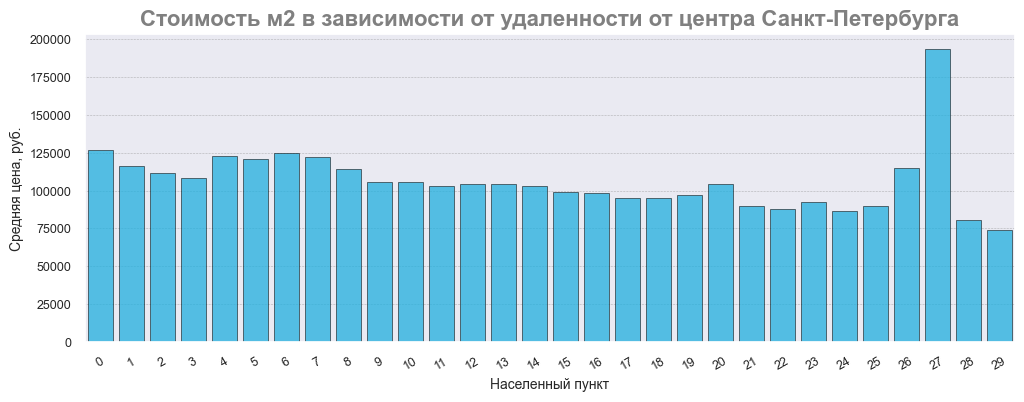

In [757]:
# Для наглядности строим гистограмму
ax=sns.barplot(data=data[(data['locality_name'] ==  'Санкт-Петербург')], 
                x='city_centers_nearest_km', 
                y='price_square_meter', 
                estimator='median', 
                color=bar_color,
                alpha=.75, 
                linewidth=.5, 
                edgecolor='black', 
                errorbar=None)

# Настраиваем график
ax.tick_params(axis='x', rotation=30)
ax.set_title(f'Стоимость м2 в зависимости от удаленности от центра Санкт-Петербурга', \
                fontdict=fd_16)
ax.tick_params(axis='both', labelsize=9)
ax.set_ylabel('Средняя цена, руб.', fontsize=10)
ax.set_xlabel('Населенный пункт', fontsize=10) ;

Тенденция к снижению цены по мере удаления от центра города очевидна, однако на графике есть сильные выбросы на **26** и **27 км**. Возможно это связанно с тем, что по этим километрам мало данных. Проверим это предположение.

In [752]:
# Выберем из основного датафрейма объекты находящиеся в границах Санкт-Петербурга, применим функцию value_counts для столбца с расстоянием от центра города в км.
data[data['locality_name'] == 'Санкт-Петербург']['city_centers_nearest_km'].value_counts()

city_centers_nearest_km
12    1542
14    1470
11    1384
13    1374
15    1327
16    1073
10     889
4      822
5      680
9      675
8      656
3      490
17     474
6      403
7      371
2      269
1      206
21     179
18     155
22     122
19      73
0       66
25      62
20      52
23      27
24      18
28       7
27       1
29       1
26       1
Name: count, dtype: int64

Предположение подтвердилось, на расстояниях **26**, **27**,** 29 км**. всего по одному объявлению.

Кроме того, есть всплески стоимости на расстояних **20 - 25 км**. от центра города, в эти диапазоны могут попадать объекты находящиеся в ближайших пригородах Санкт-Петербурга: Пушкин, Стрельна, Сестрорецк, Павловск. Формально эти пригороды входят в состав Санкт-Петербурга и стоимость м2 в этих населенных пунктах может быть достаточно высокой.

Для определения стоимости километра предлагается разность медианной стоимости м2 нулевого и самого дальнего от центра километров и разделить на количество километров между ними. Т.к. по **29 км**. только одно объявление предлагается взять для расчета **28 км**.

In [753]:
# Создаем вспомогательный датафрейм с объектами в находящимися в черте Санкт-Петербурга
spb_data = data[data['locality_name'] == 'Санкт-Петербург']

# Раасчитываем медиану стомости м2 для нулевого и 28 км.
zero_km = spb_data[spb_data['city_centers_nearest_km'] == 0]['price_square_meter'].median()
last_km = spb_data[spb_data['city_centers_nearest_km'] == 28]['price_square_meter'].median()

In [754]:
# Вычисляем стоимость одного километра удаления от центра Санкт-Петербурга
price_km = int((zero_km - last_km) / 29)
print(f'Средняя стоимость одного километра удаления от центра Санкт-Петербурга {price_km}')

Средняя стоимость одного километра удаления от центра Санкт-Петербурга 1606


**Вывод:** 

1. Средняя стоимость одного километра удаления квартиры от центра Санкт-Петербурга составила **1606 руб**., очевидна тенденция снижения стоимости м2 по мере удаления от центра города, однако данный расчет не учитывает множество других факторов влияющих на стоимость жилья. Например, престижность района города, наличие исторических объектов, транспортная доступность и т.д.

## Общий вывод

 В рамках проекта по исследованию рынка жилой недвижимости Санкт-Петербурга выполнен анализ предоставленного датасета. Цель исследования определить ключевые параметры для настройки системы отслеживающей аномалии и мошеннические схемы. Период выборки **ноябрь 2014 - май 2019 года**. Общий объем выборки после предобработки данных **22 702** записи. В результате анализа можно сделать следующие выводы:

 1. На рынке жилой недвижимости Санкт-Петербурга основным сегментом являются одно и двухкомнатные квартиры, они занимают сумарно **69 %** (**35 %** и **34 %** соотвеветственно) от общего предложения, доля трехкомнатных квартир составлят **24 %**, по **1 %** занимают студии и пятикомнатные квартиры.
 2. Самый массовый сегмент по стоимости квартир находится в диапазоне **3.5-4 млн руб**.
 3. Самый массовый сегмент по общей площади объекты площадью **35 - 65 м2**.
 4. Основные факторы влияющие на конечную стоимость квартир - общая и жилая площади, коэффициент корреляции **0.86** и **0.77** соотвественно.
 5. Самая высокая активность на рынке наблюдается в период с февраля по апрель и с сентября по нобярь, в разрезе недели со среды по четверг.
 6. Наиболее дорогая недвижимость за пределами Санкт-Петербурга находится в г.Пушкин - **99 629 руб/м2**, д.Кудрово - **95 112 руб./м2** и п.Парголово - **90 175 руб/м2**, самая доступная в г.Выборг - **58 141 руб/м2**. Приведена медианная стоимость м2.
 7. Количество предложений объектов на последних этажах домов превышает на **2 %** количество предложений на первых, возможно это связанно с тем, что последние этажи более часто имеют технические эксплатационные проблемы.
 8. Средняя стоимость километра удаленности о центра Санкт-Петербурга для объектов находящихся в черте города составляет **1 606 руб/м2** и подтверждает гипотезу о том, что чем дальше от центра тем дешевле жилье.
 9. Определен параметр "быстрой" продажи объекта - до **30** дней, "долгая" продажа свыше **60** дней.
 10. По параметрам жилая площадь и площадь кухни не удалось провести полноценный анализ так как качество данных вызвает сомнения.
 
 Для настройки системы рекомендуется доработать процедуру подачи и последующей модерации объявлений с целью снижения передачи некорректной информации по основным харрактеристикам квартир.
 
 Разработать механизм автоматического расчета расстояния до центра города и до аэрлпорта для исключения случаев мошенничества